In [9]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from openfast_io.turbsim_file import TurbSimFile
from openfast_io.turbsim_util import TurbsimReader, TurbsimWriter

# parallelize the processing



In [10]:

hurrCat = 'CAT2'
numSeeds = 36
writeFolder = '../turb_sim/TurbSimGenFiles'

baseInputFolder = '../turb_sim'

# change this to your path to TurbSim executable
TurbSimExe = '../../i_devFiles/openfast/build/modules/turbsim/turbsim'

In [7]:
# functions
def turbSimSeedGen(baseInputFile, runDir, nSeeds=36, seed=0):
    # Reading turbsim input file
    ts_reader = TurbsimReader()
    ts_reader.read_input_file(baseInputFile)

    # if write folder does not exist, create it
    if not os.path.exists(runDir):
        os.makedirs(runDir)

    # need to copy the user defined spectrum file to the run directory
    if ts_reader.UserFile != '':
        shutil.copy(os.path.join(os.path.dirname(baseInputFile), ts_reader.UserFile), runDir)
    
    if ts_reader.ProfileFile != '':
        shutil.copy(os.path.join(os.path.dirname(baseInputFile), ts_reader.ProfileFile), runDir)


    inputFiles = []
    btsFiles = []

    # Generating seeds
    for i in range(nSeeds):
        ts_reader.RandSeed1 = seed + i
        ts_writer = TurbsimWriter(ts_reader)
        fileName = os.path.join(runDir, f'turbInput_{i+1}.inp')

        ts_writer.execute(fileName)

        inputFiles.append(fileName)
        btsFiles.append(f'{fileName[:-4]}.bts')


    


    return inputFiles, btsFiles



In [ ]:

for hurrCat in ['CAT1', 'CAT2', 'CAT3', 'CAT4', 'CAT5']:
    # Generate the turbSim .bts files based on selected hurricane category
    writeFolder = os.path.join(writeFolder, hurrCat)
    inputFiles, btsFiles = turbSimSeedGen(os.path.join(baseInputFolder, f'TurbSim_{hurrCat}.inp'), f'{writeFolder}/withoutRamp', nSeeds = numSeeds)

    # runing the TurbSim executable 
    for i in range(numSeeds):
        os.system(f'{TurbSimExe} {inputFiles[i]}')

In [12]:
# list all the .bts files in writeFolder
btsFiles = []
for root, dirs, files in os.walk(writeFolder):
    for file in files:
        if file.endswith('.bts'):
            btsFiles.append(os.path.join(root, file))

btsFiles.sort()
print(btsFiles)

['../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_1.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_10.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_11.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_12.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_13.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_14.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_15.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_16.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_17.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_18.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_19.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_2.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_20.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_21.bts', '../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_22.bts', '../turb_sim/TurbSimGenFil

<TurbSimFile object> with keys:
 - filename: ../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_1.bts
 - ID: 8
 - z: [5.0 ... 294.9999885559082],  dz: 10.357142448425293, n: 29 
 - y: [-160.0 ... 160.0],  dy: 10.0, n: 33 
 - t: [0.0 ... 999.9500149],  dt: 0.05, n: 20000 
 - u: (3 x 20000 x 33 x 29) 
    ux: min: 15.707546685223852, max: 58.133141060158756, mean: 42.26360904947328 
    uy: min: -30.125255783349488, max: 31.29852715699803, mean: 0.5223134827903122 
    uz: min: -6.764216399309244, max: 6.771726255339744, mean: -5.387550359546272e-09 
    yMid: 0.0 - zMid: 149.9999942779541 - iy: 16 - iz: 14 - uMid: 44.93498080592575 (nearest neighbor))
 Useful methods:
 - read, write, toDataFrame, keys
 - valuesAt, vertProfile, horizontalPlane, verticalPlane, closestPoint
 - fitPowerLaw
 - makePeriodic, checkPeriodic

8000
<TurbSimFile object> with keys:
 - filename: ../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_10.bts
 - ID: 8
 - z: [5.0 ... 294.9999885559082],  dz: 10.3571

/tmp/ipykernel_1353891/217262226.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1, 1)


<TurbSimFile object> with keys:
 - filename: ../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_29.bts
 - ID: 8
 - z: [5.0 ... 294.9999885559082],  dz: 10.357142448425293, n: 29 
 - y: [-160.0 ... 160.0],  dy: 10.0, n: 33 
 - t: [0.0 ... 999.9500149],  dt: 0.05, n: 20000 
 - u: (3 x 20000 x 33 x 29) 
    ux: min: 18.179882340947024, max: 59.17862266282743, mean: 42.26360893475922 
    uy: min: -29.31921449216033, max: 29.47600328154636, mean: 0.5223133781458157 
    uz: min: -7.157896233469201, max: 7.298716053818846, mean: -2.4118078588968332e-08 
    yMid: 0.0 - zMid: 149.9999942779541 - iy: 16 - iz: 14 - uMid: 44.93498071627153 (nearest neighbor))
 Useful methods:
 - read, write, toDataFrame, keys
 - valuesAt, vertProfile, horizontalPlane, verticalPlane, closestPoint
 - fitPowerLaw
 - makePeriodic, checkPeriodic

8000
<TurbSimFile object> with keys:
 - filename: ../turb_sim/TurbSimGenFiles/CAT1/withoutRamp/turbInput_3.bts
 - ID: 8
 - z: [5.0 ... 294.9999885559082],  dz: 10.35714

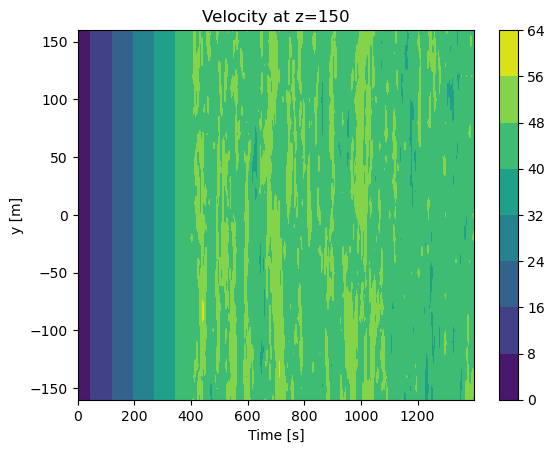

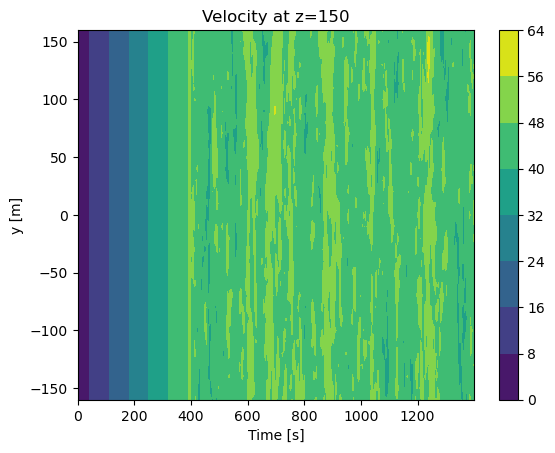

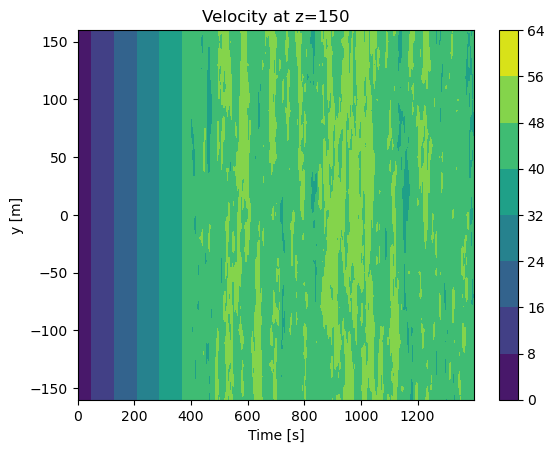

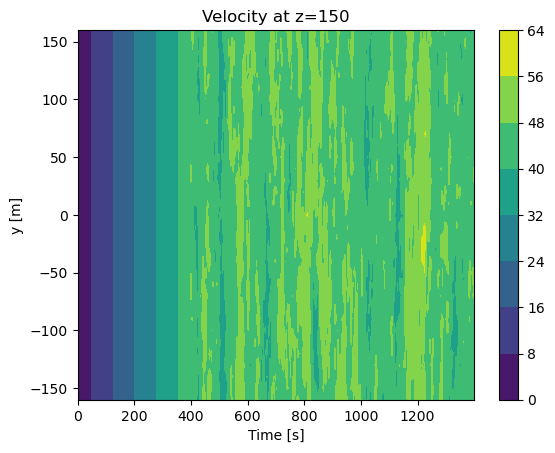

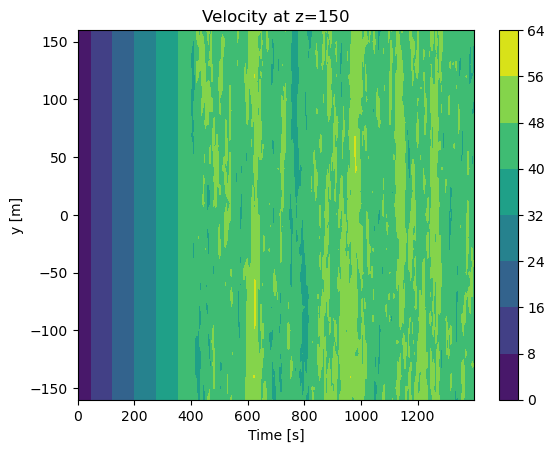

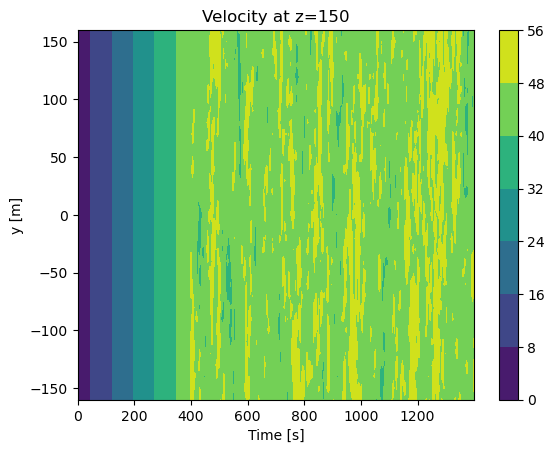

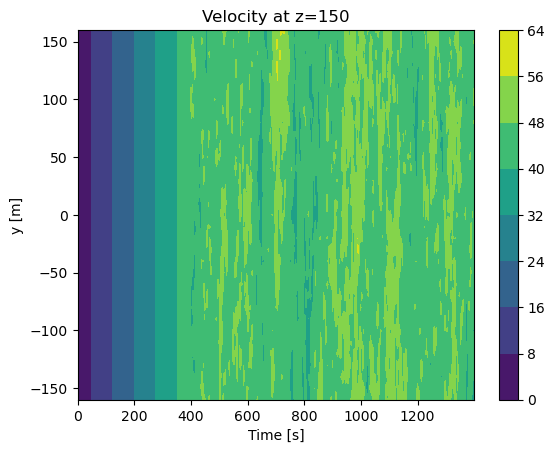

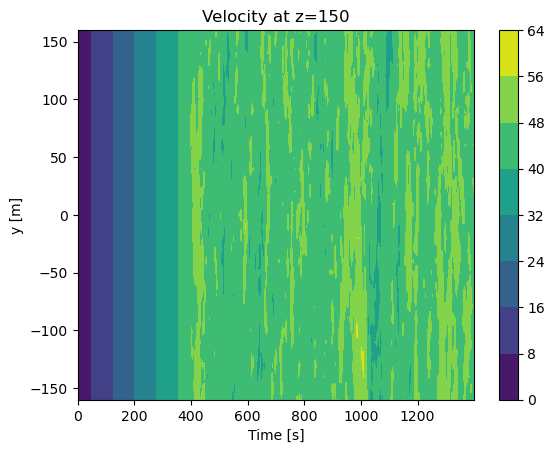

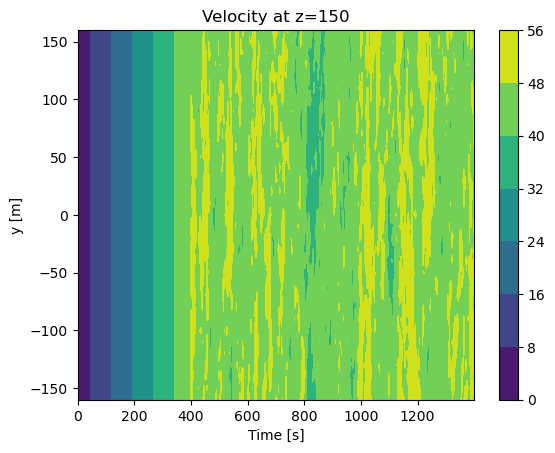

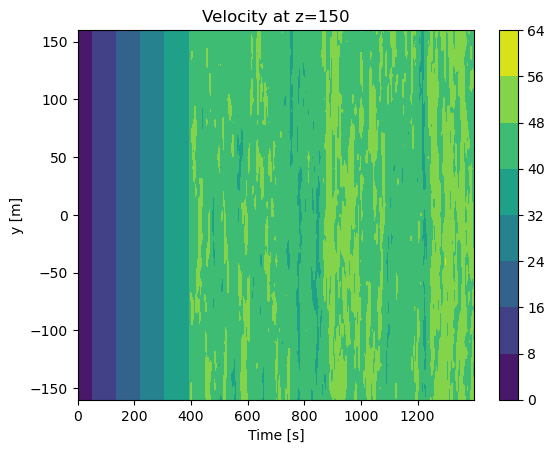

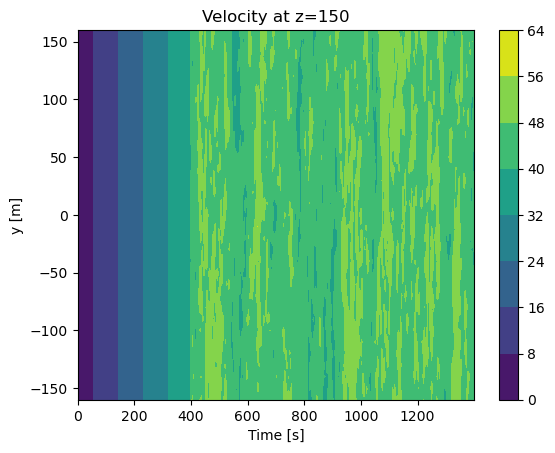

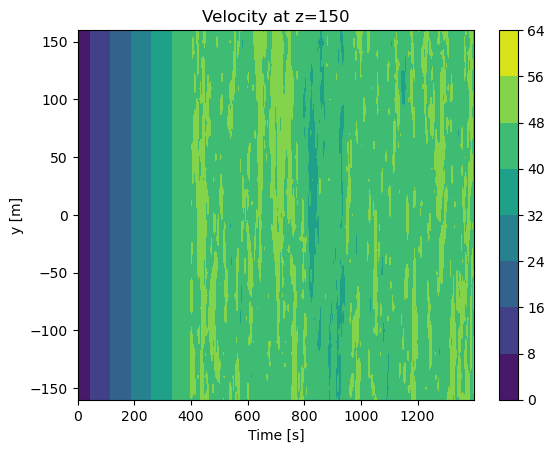

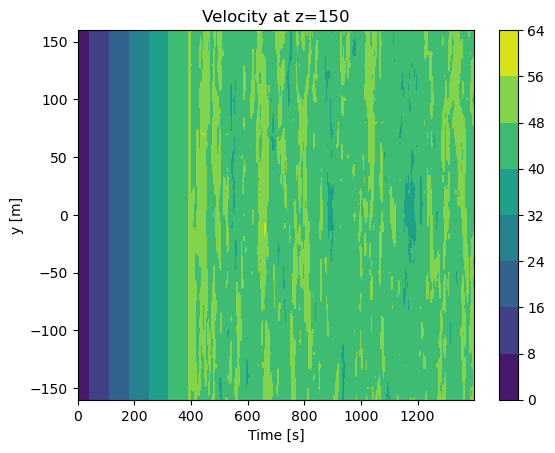

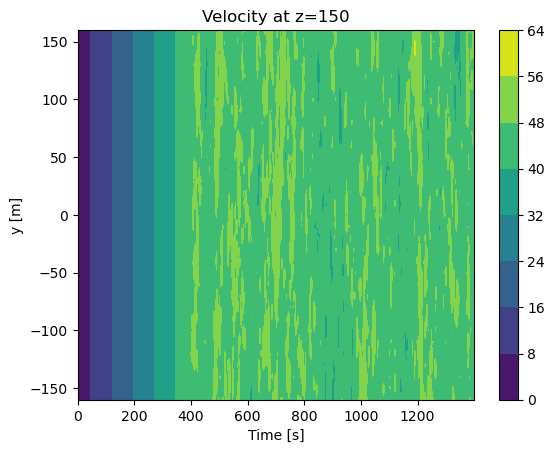

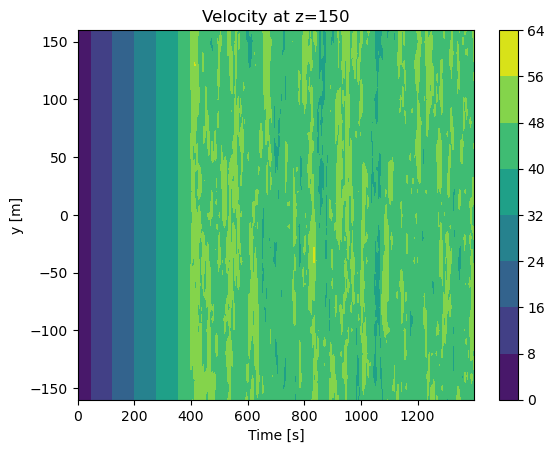

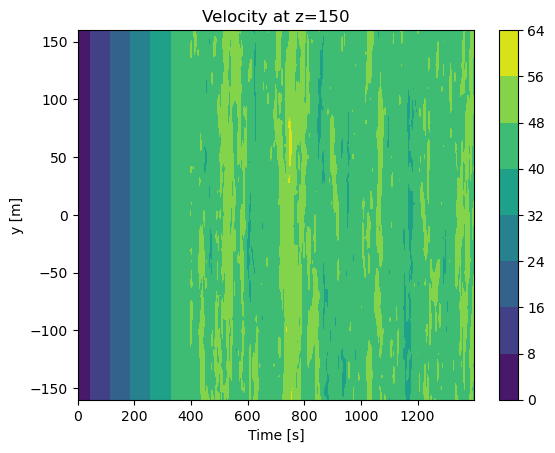

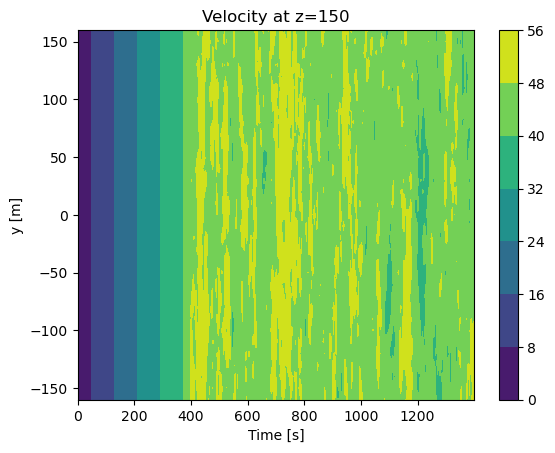

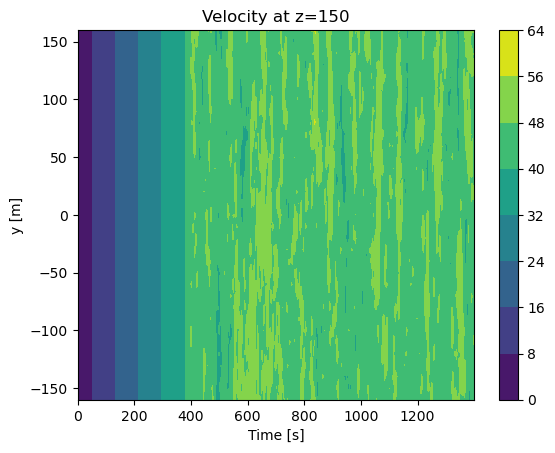

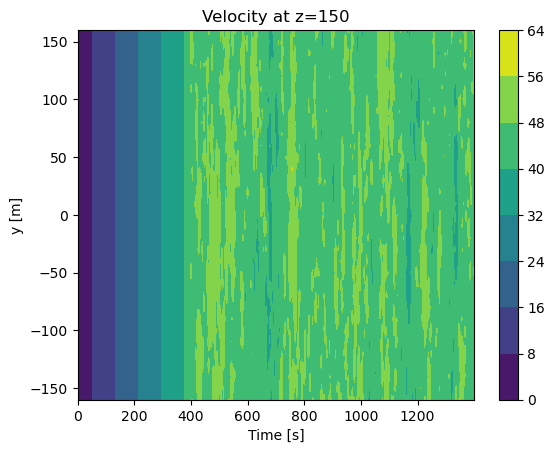

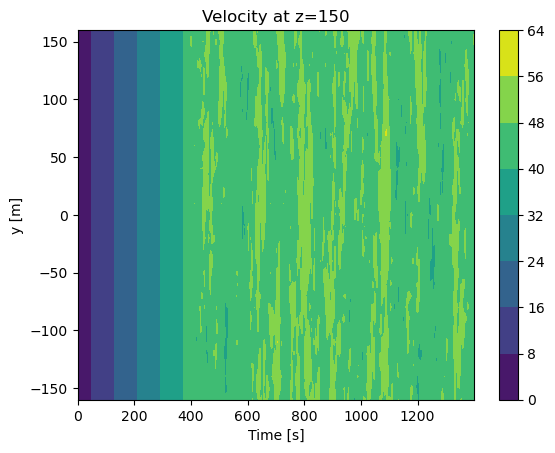

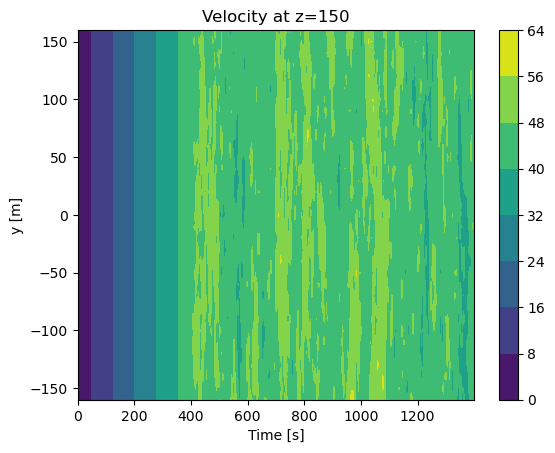

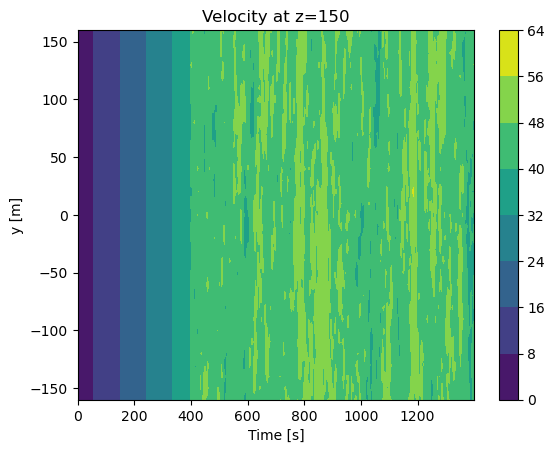

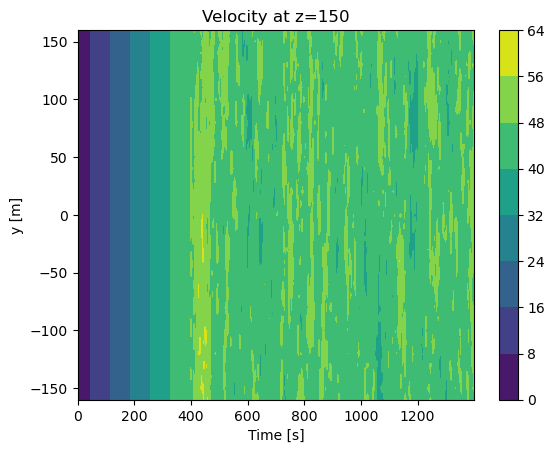

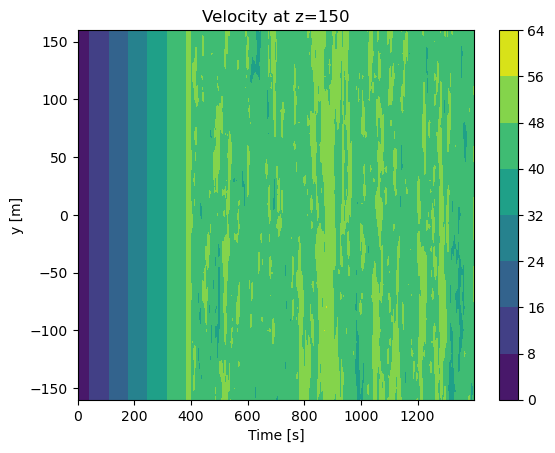

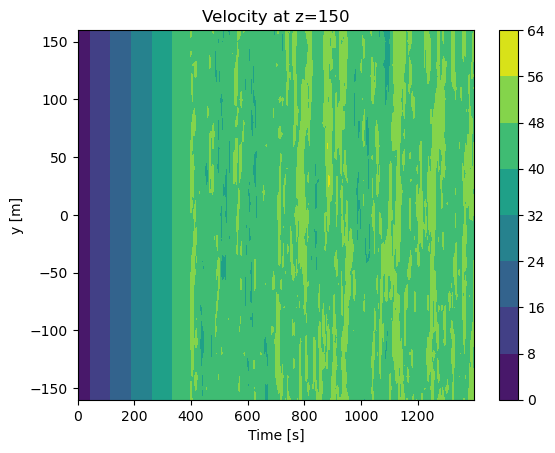

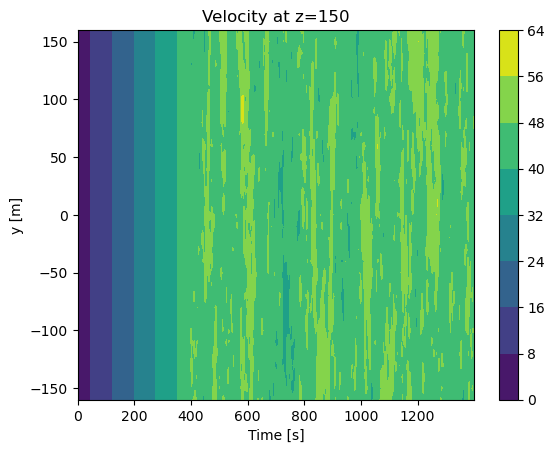

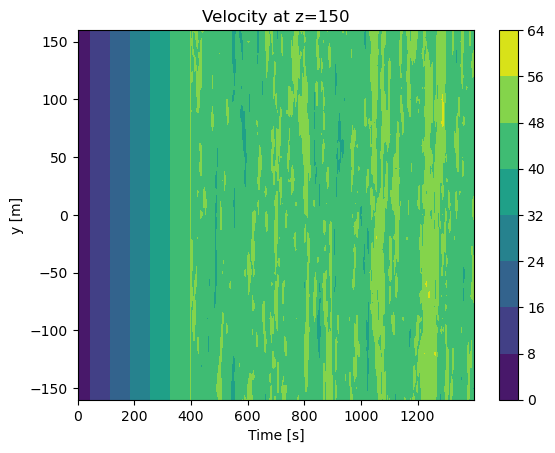

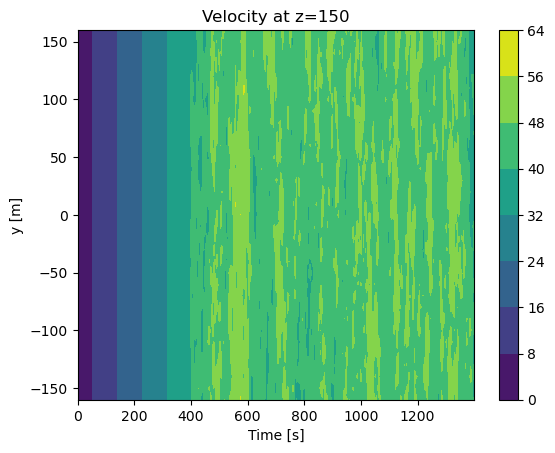

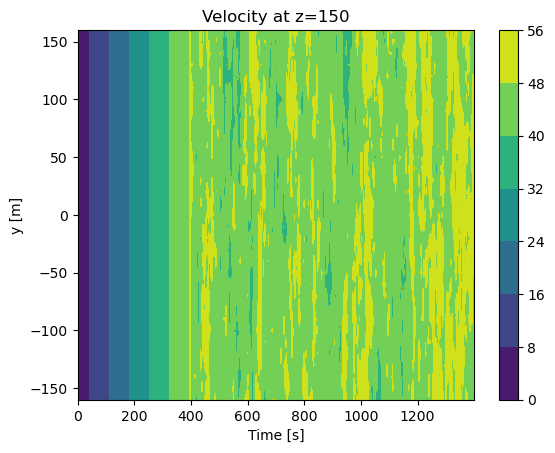

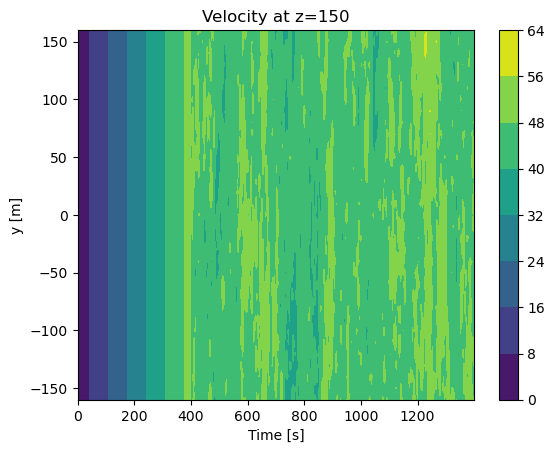

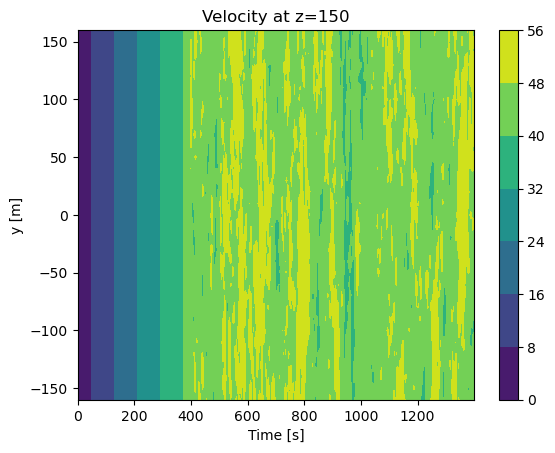

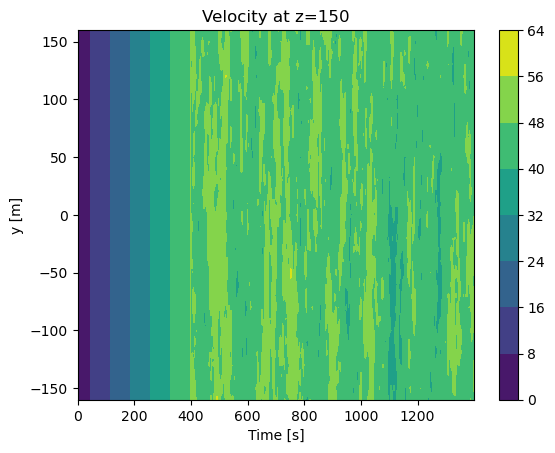

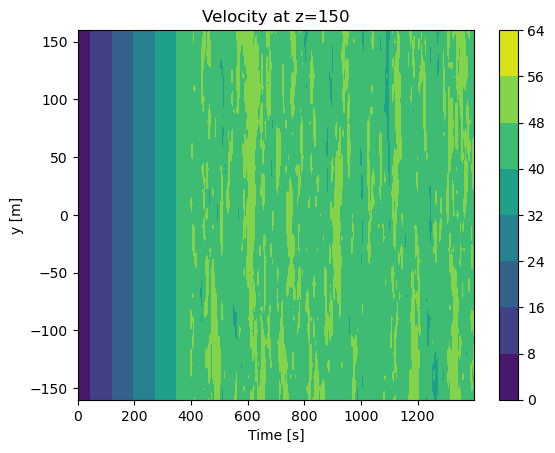

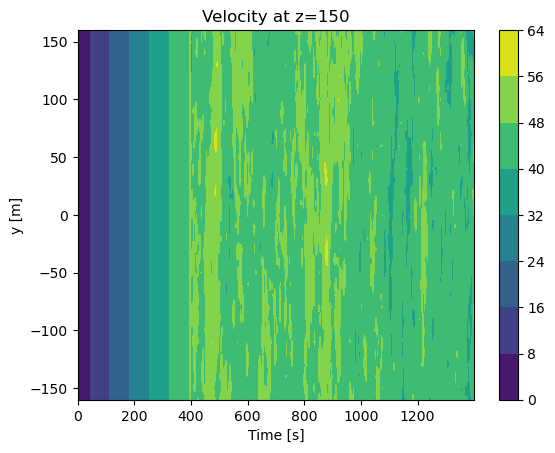

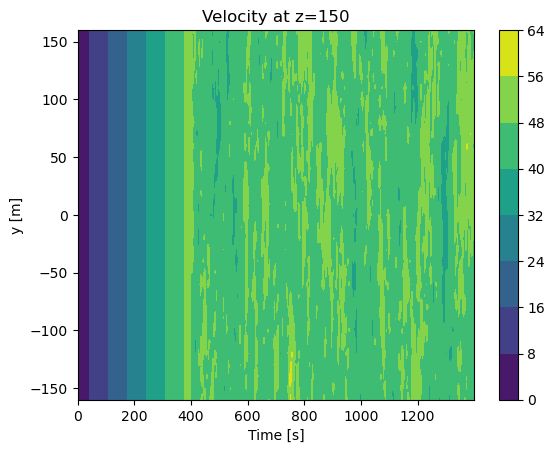

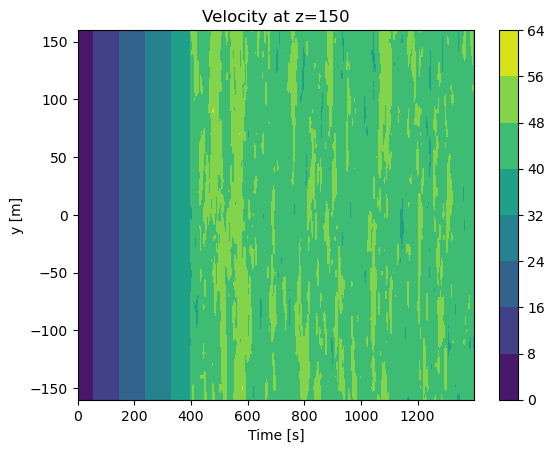

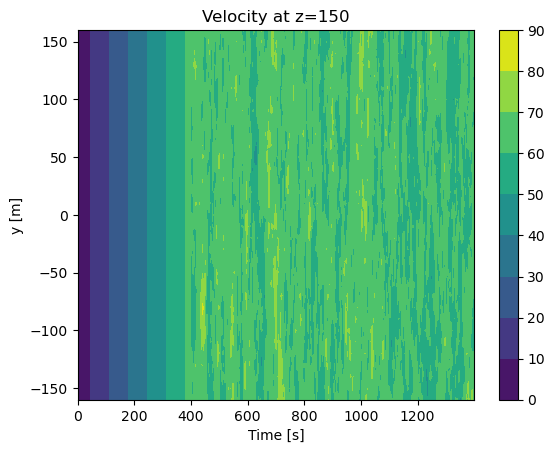

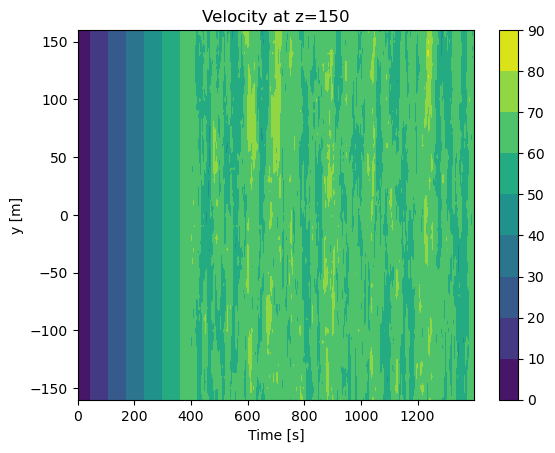

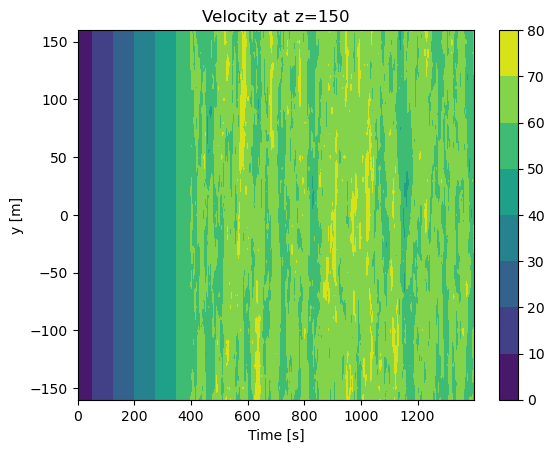

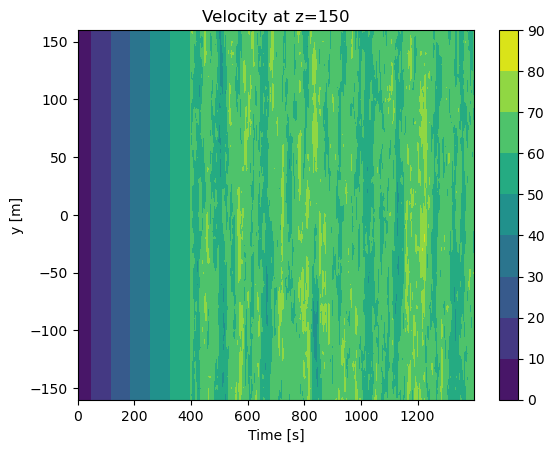

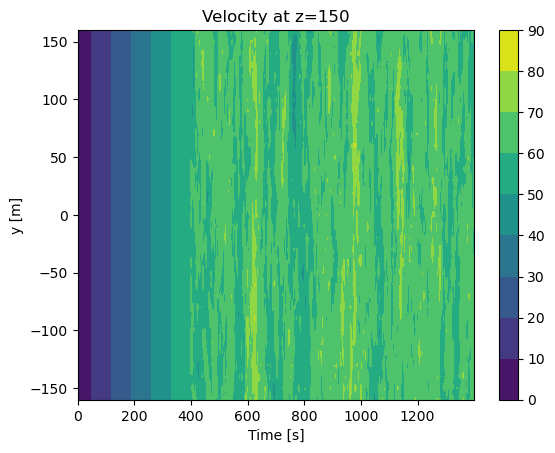

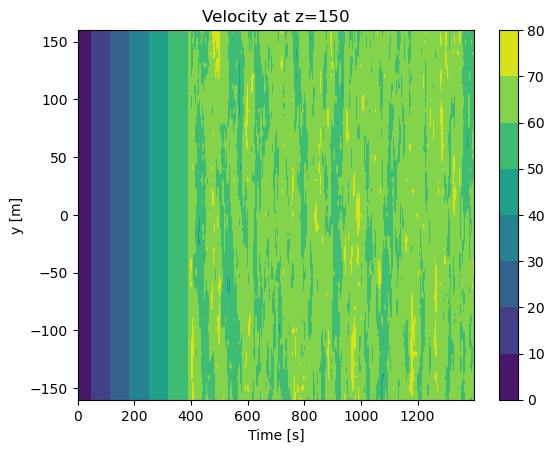

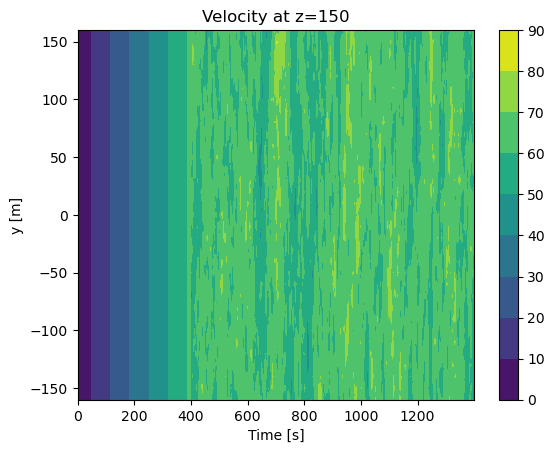

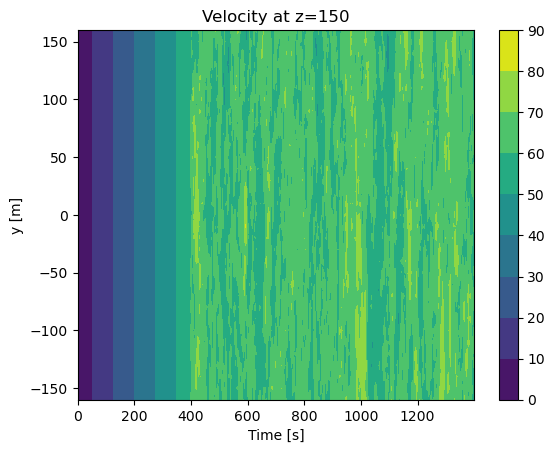

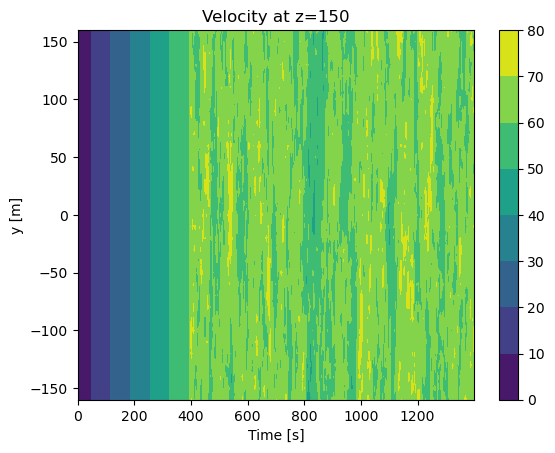

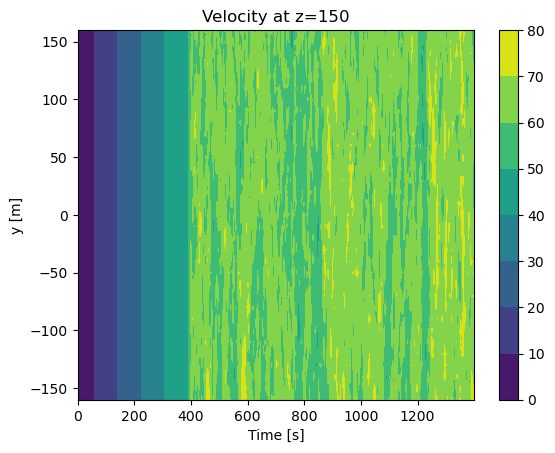

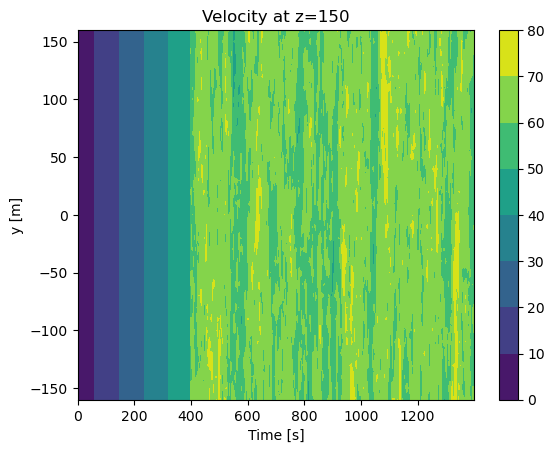

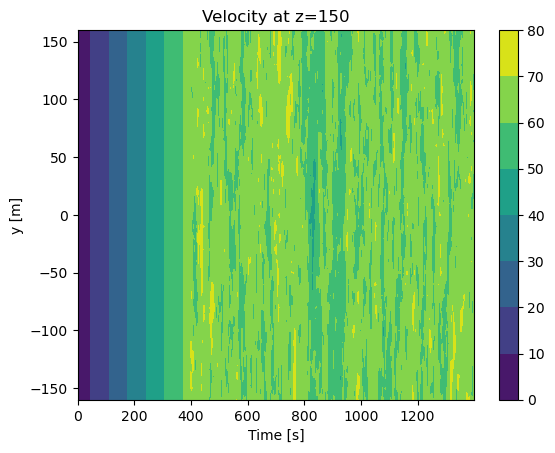

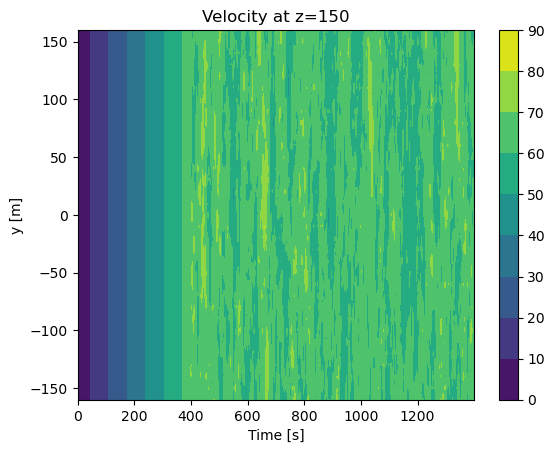

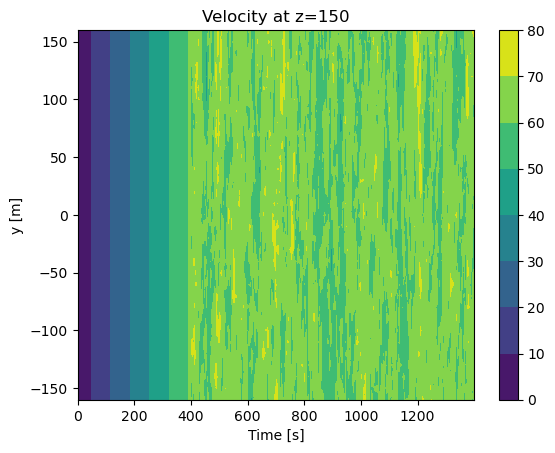

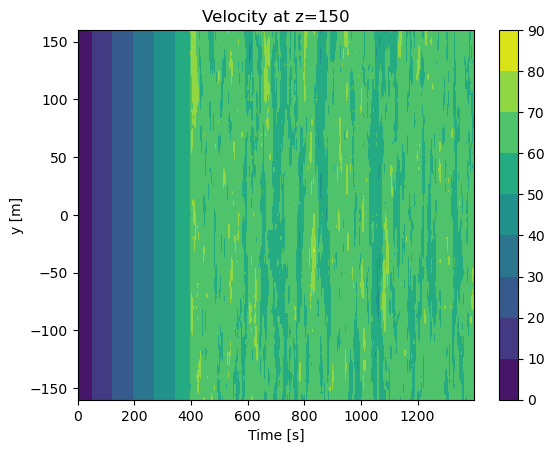

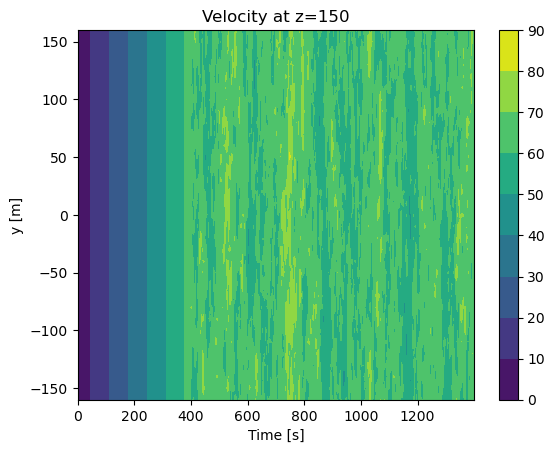

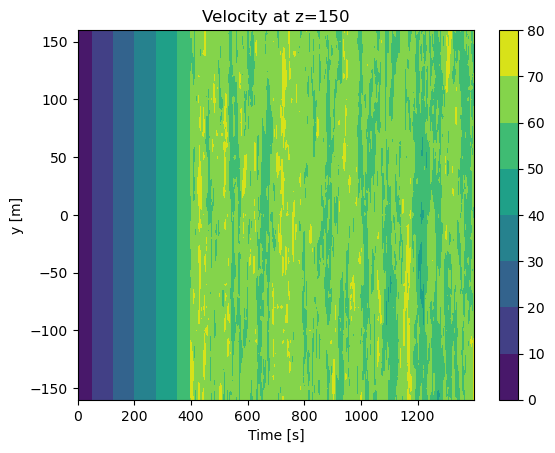

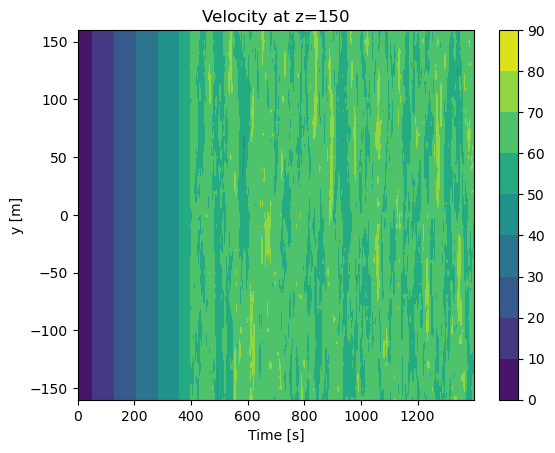

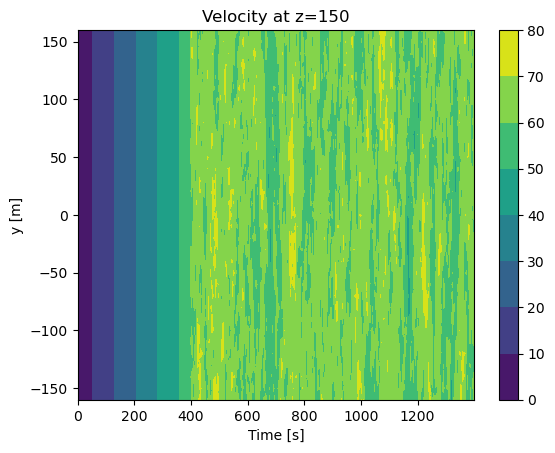

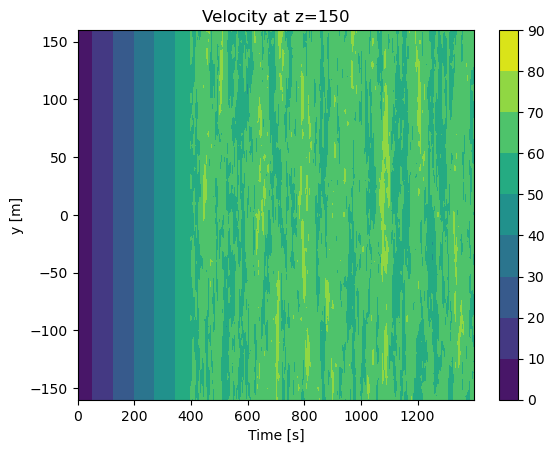

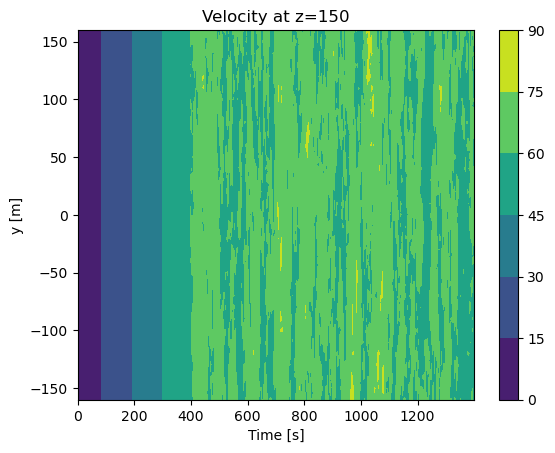

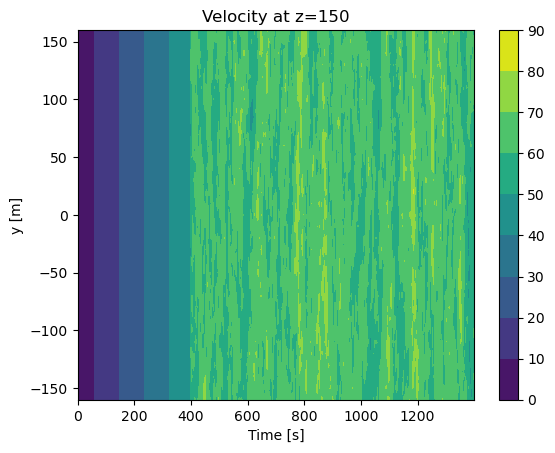

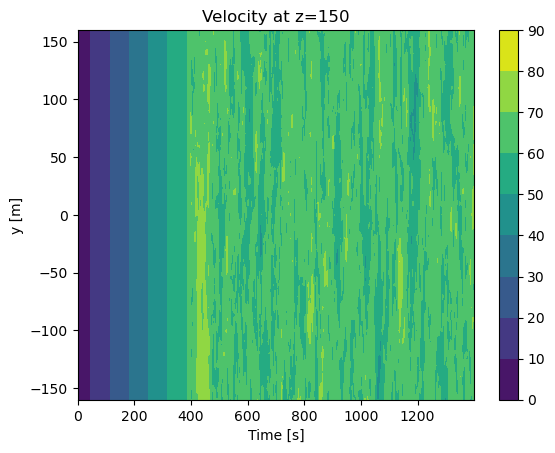

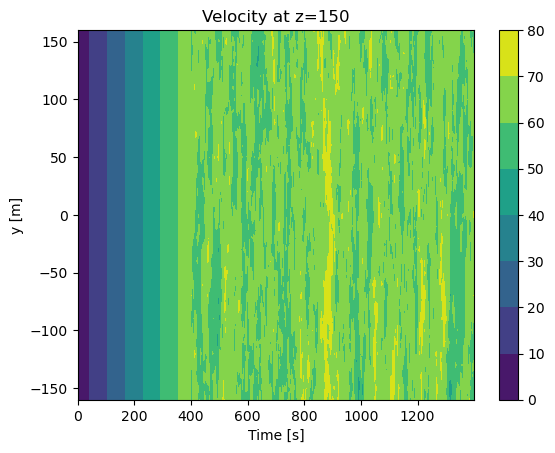

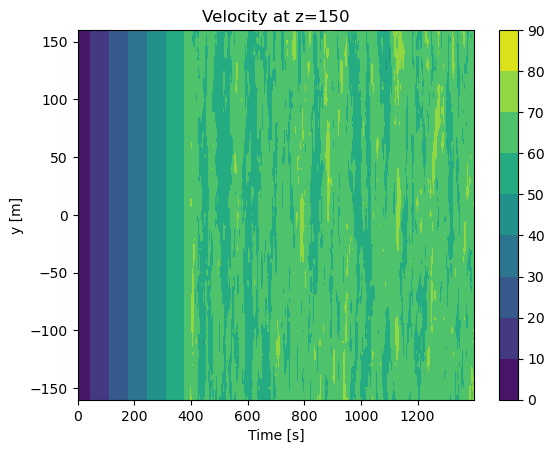

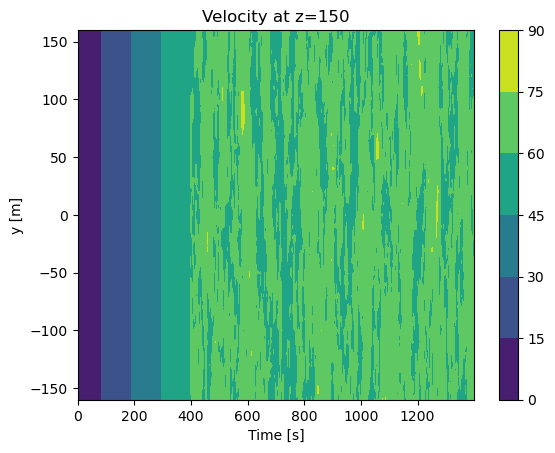

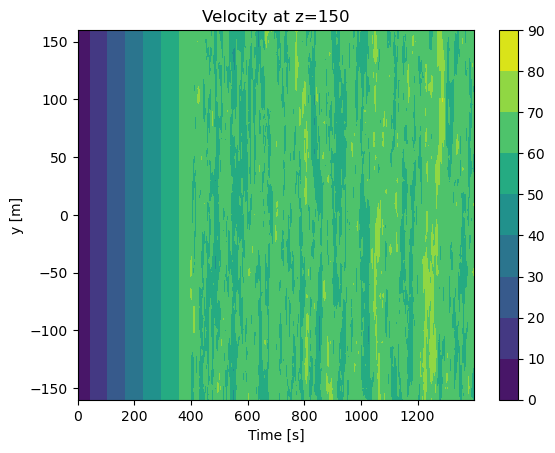

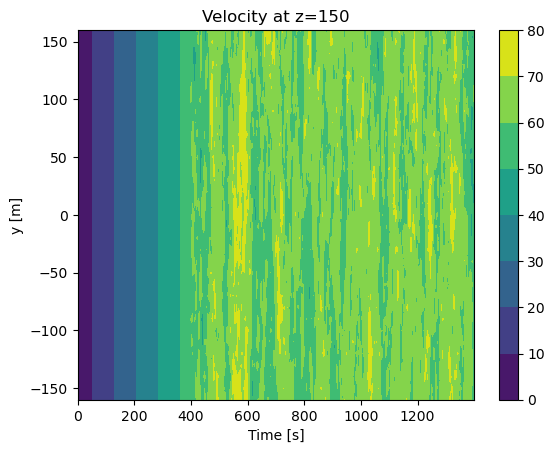

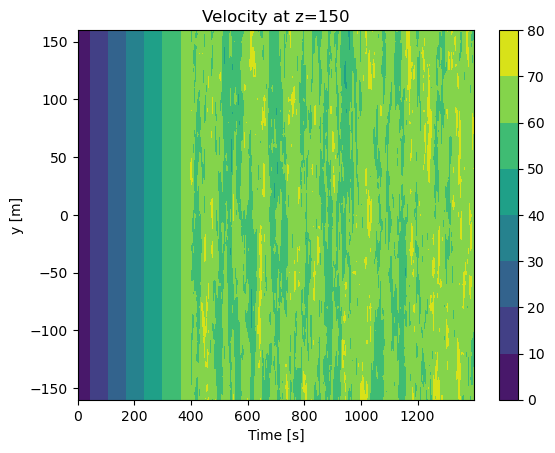

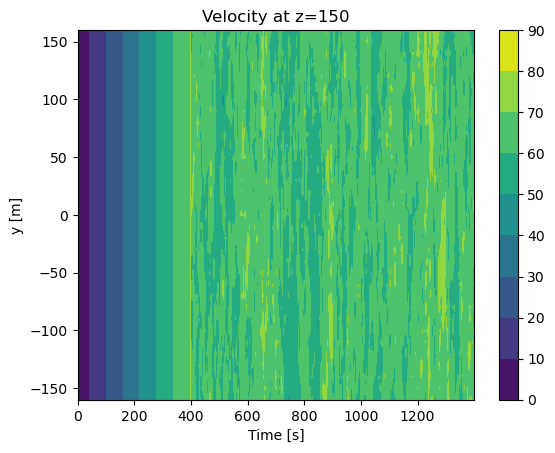

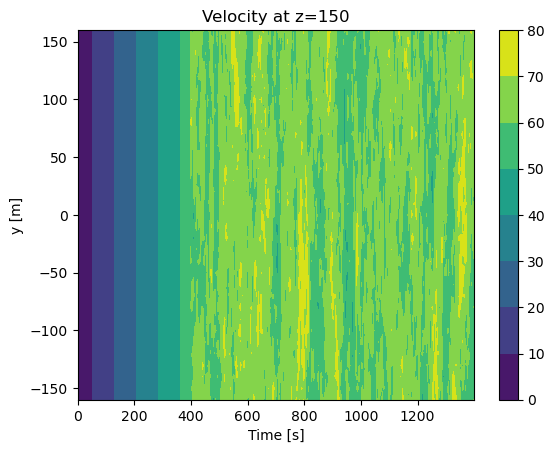

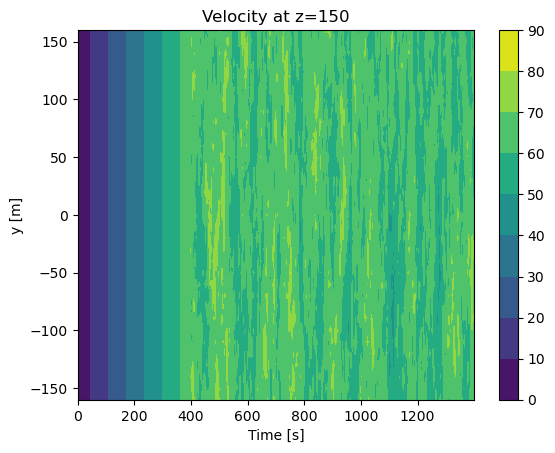

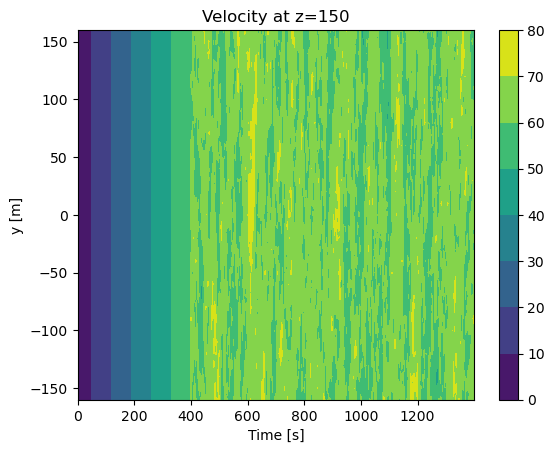

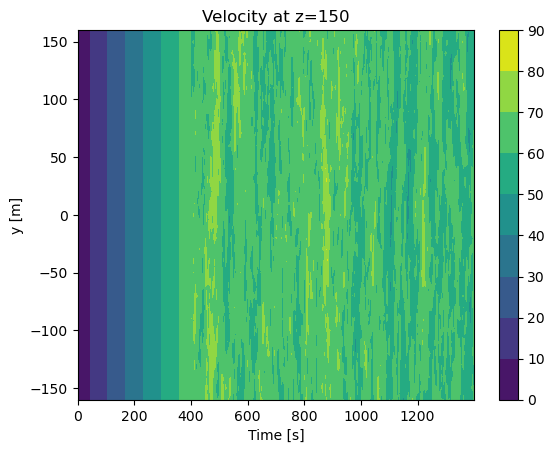

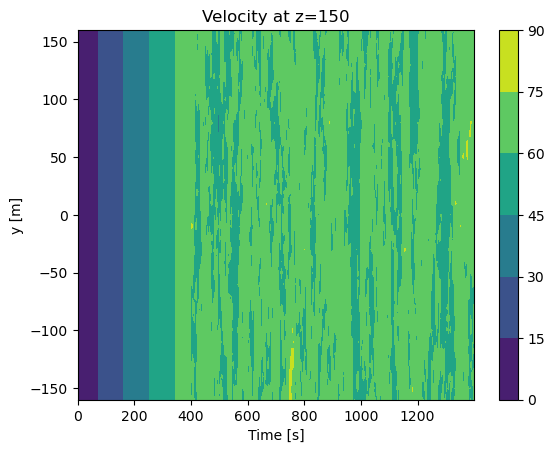

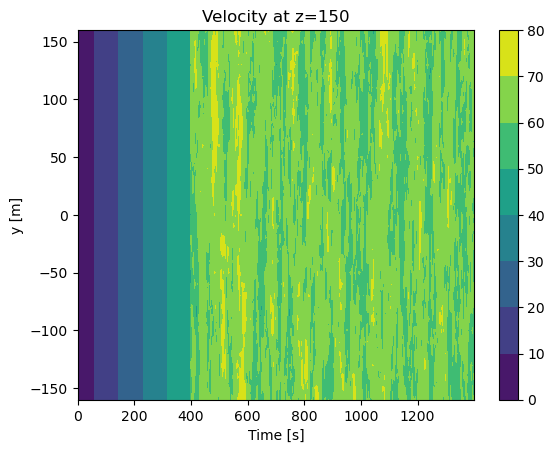

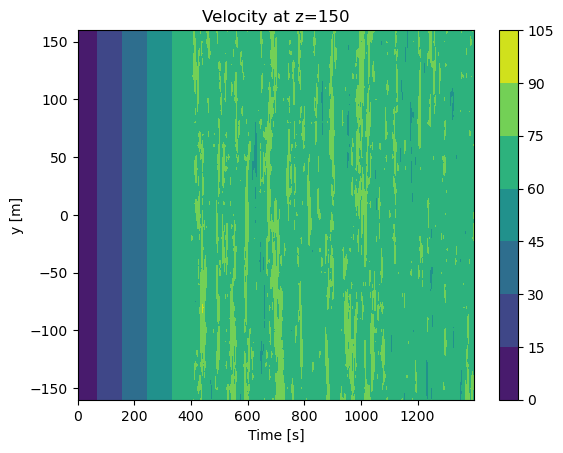

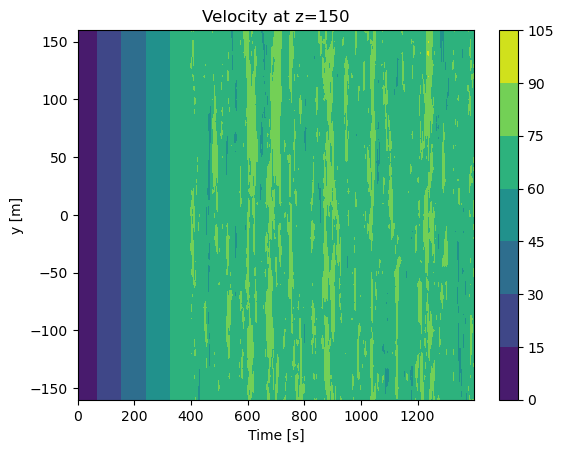

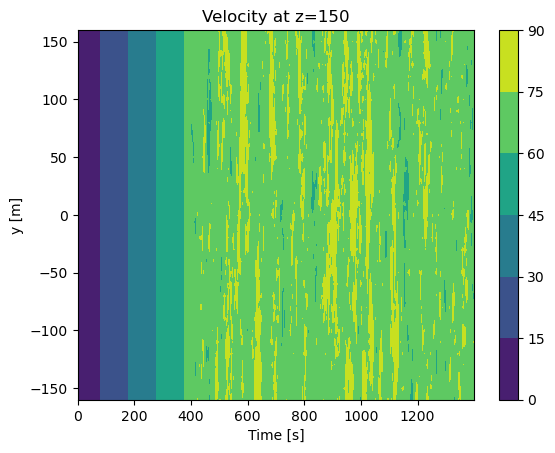

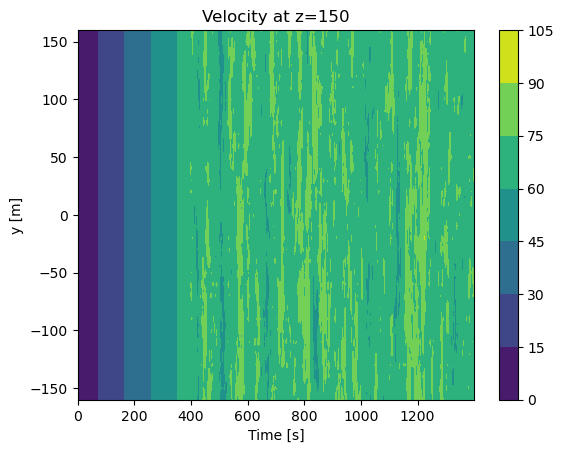

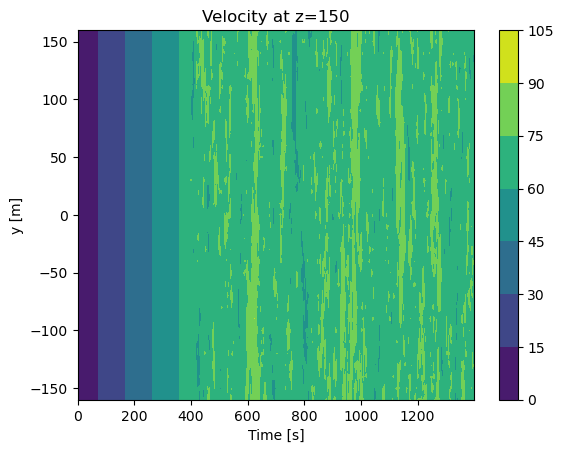

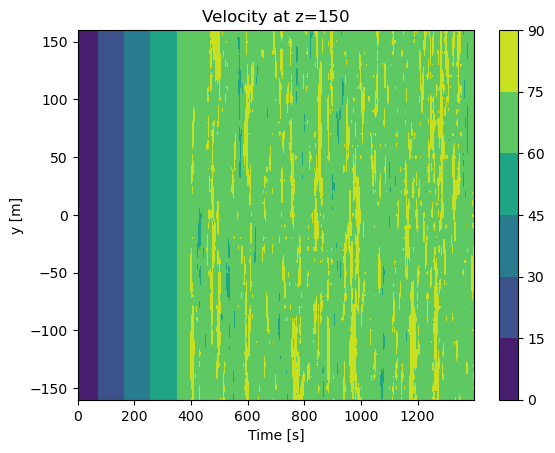

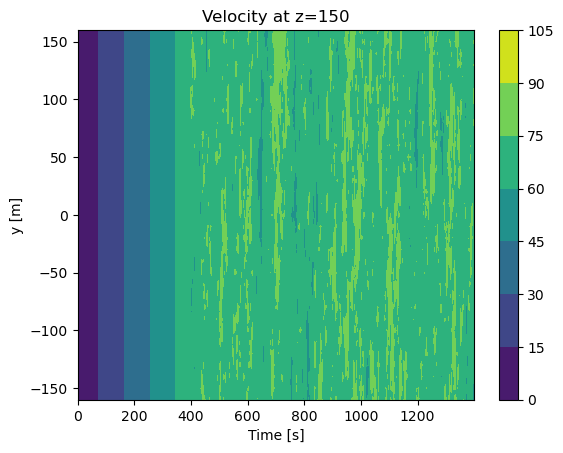

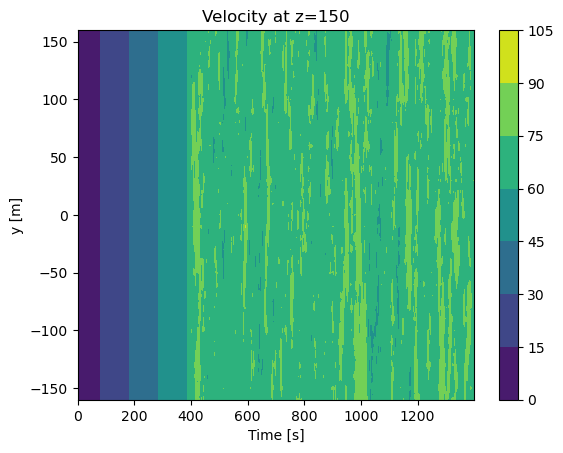

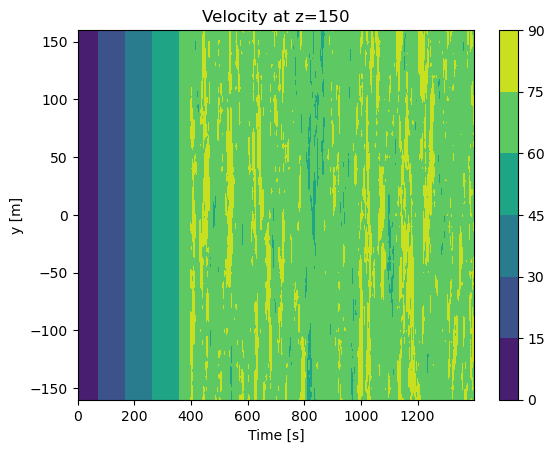

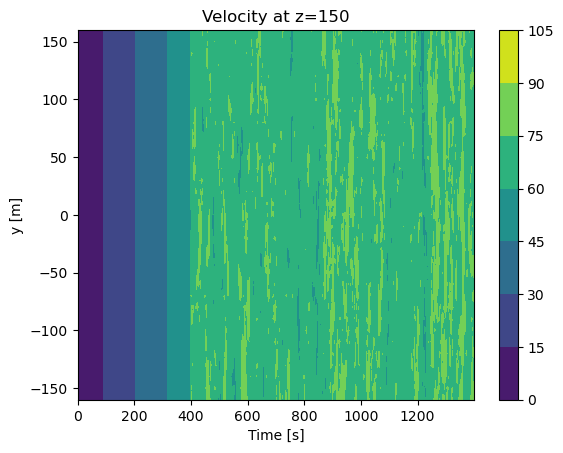

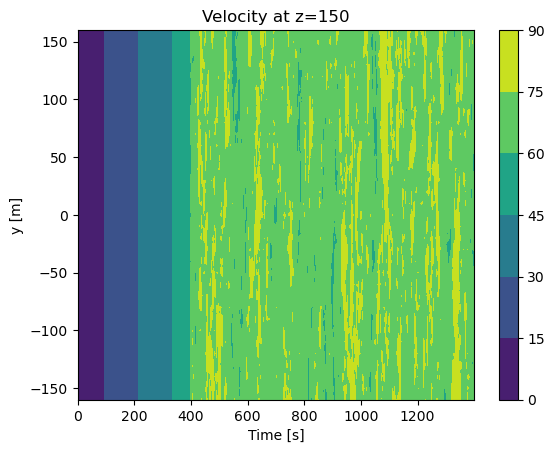

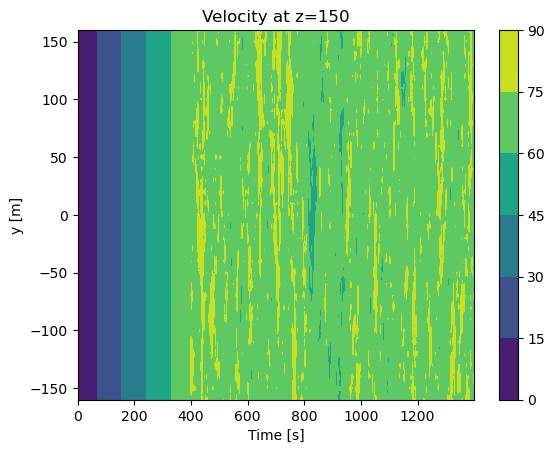

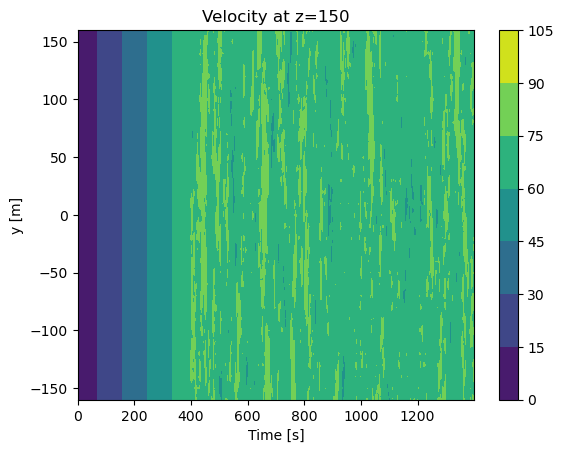

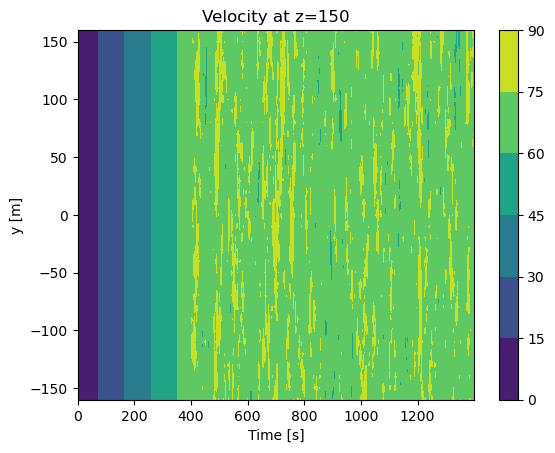

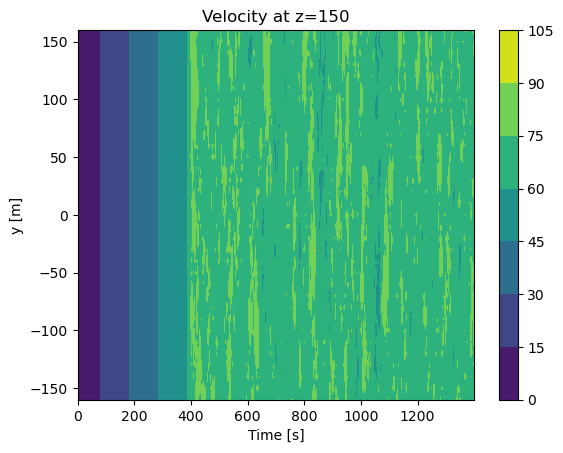

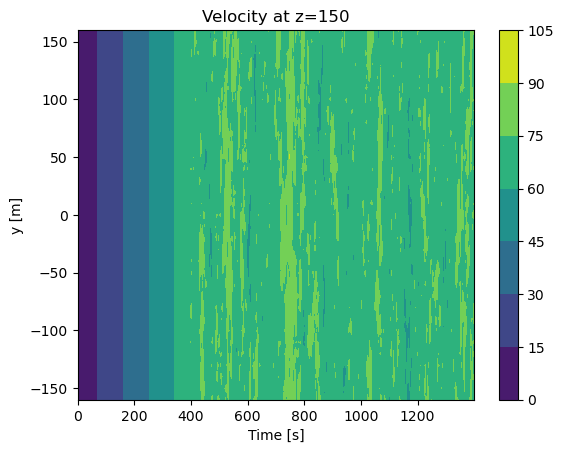

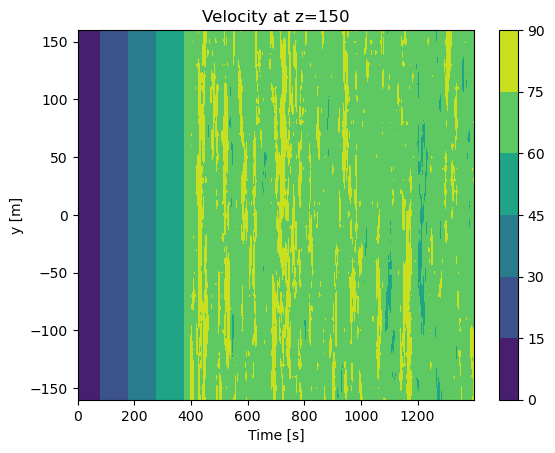

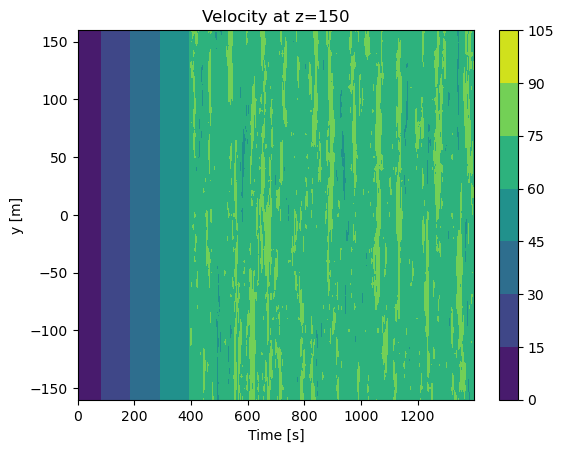

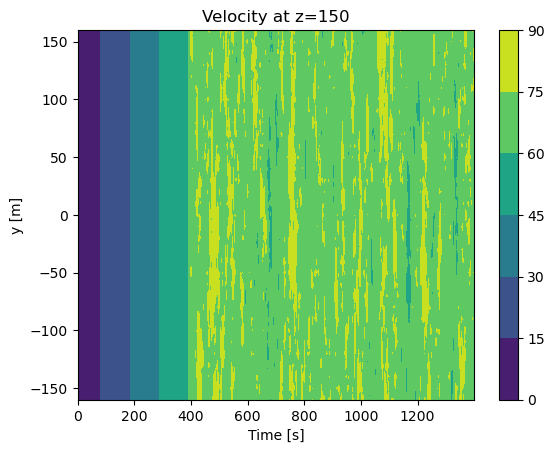

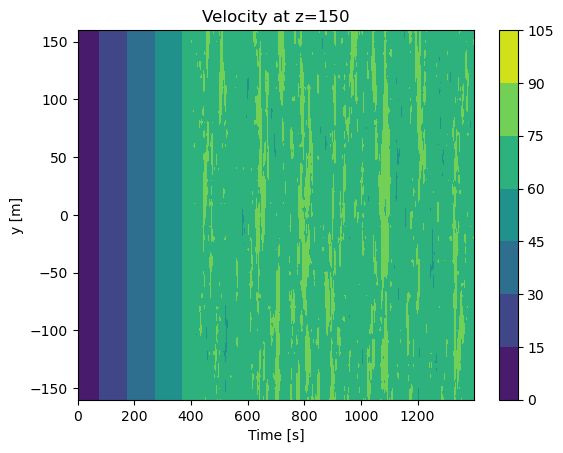

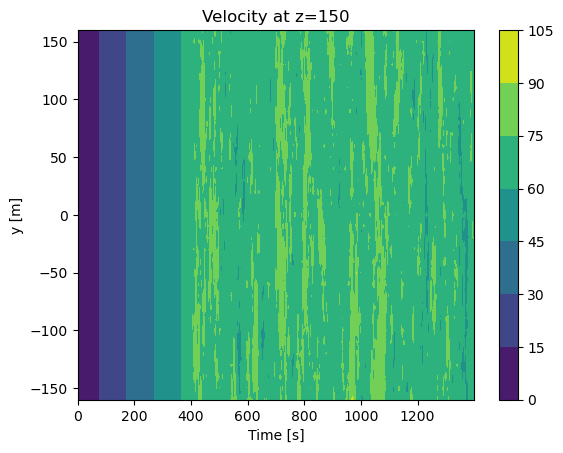

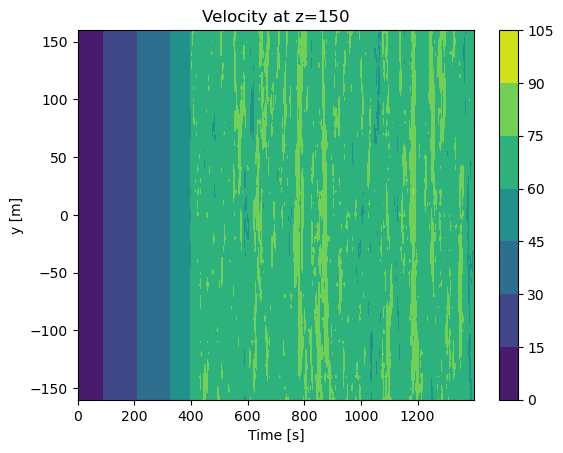

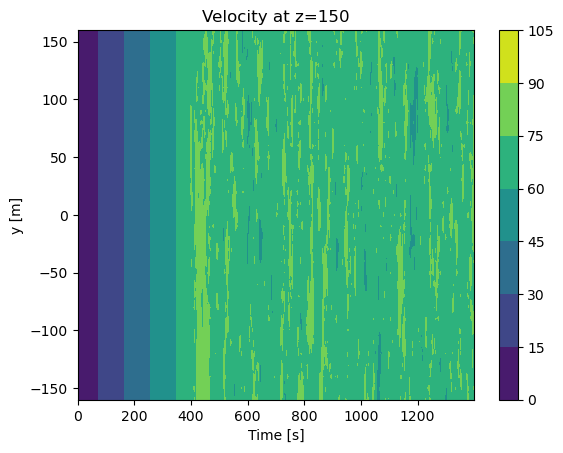

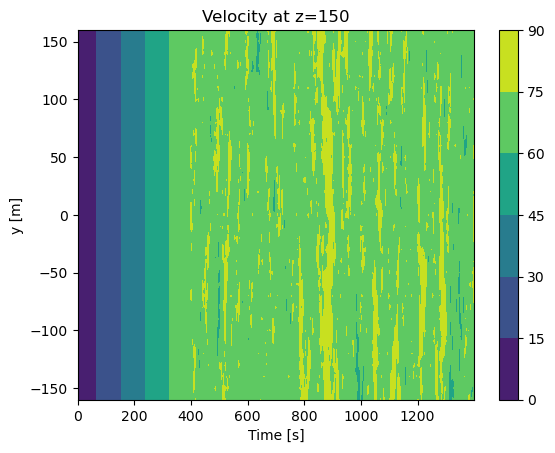

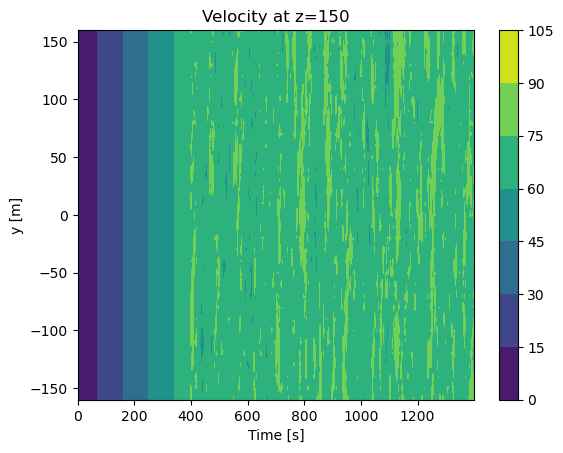

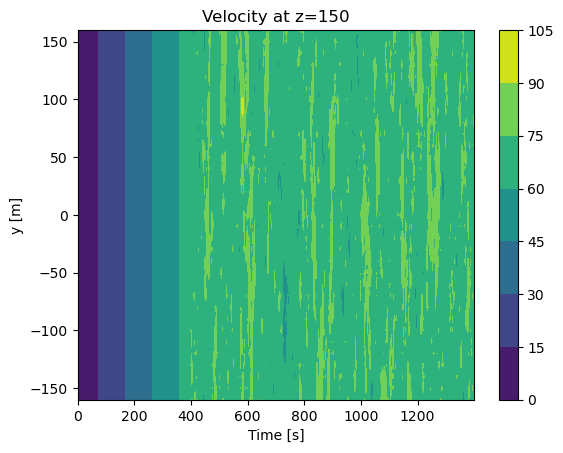

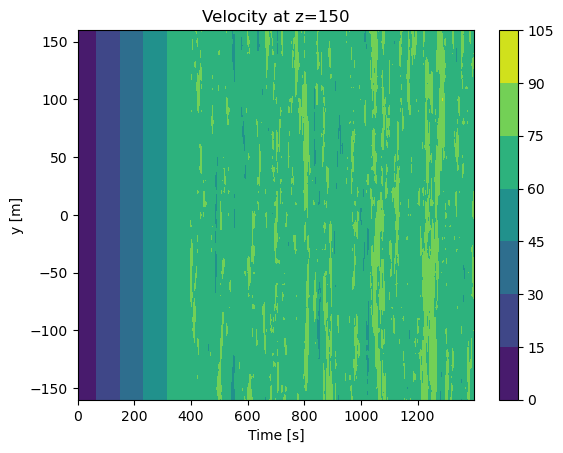

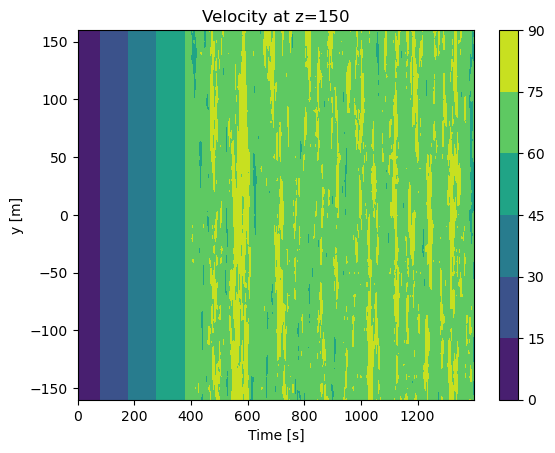

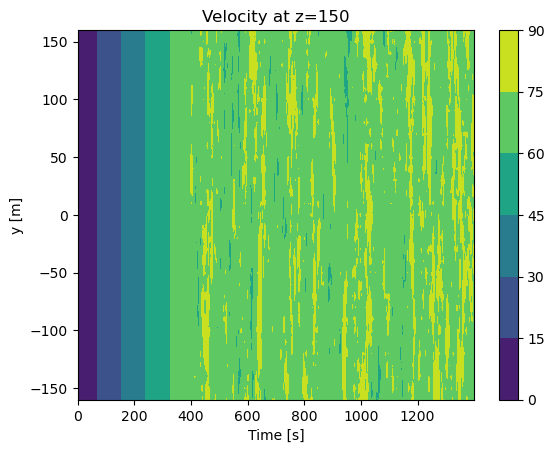

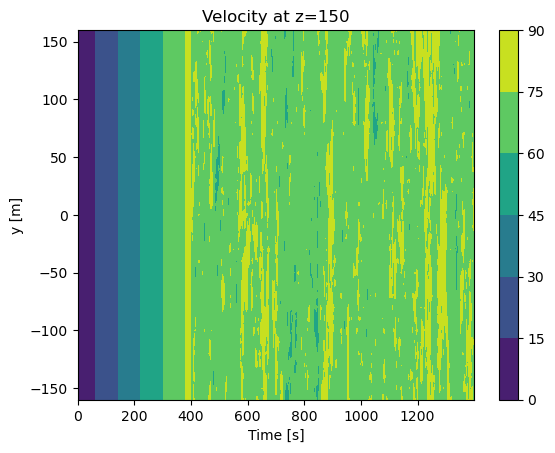

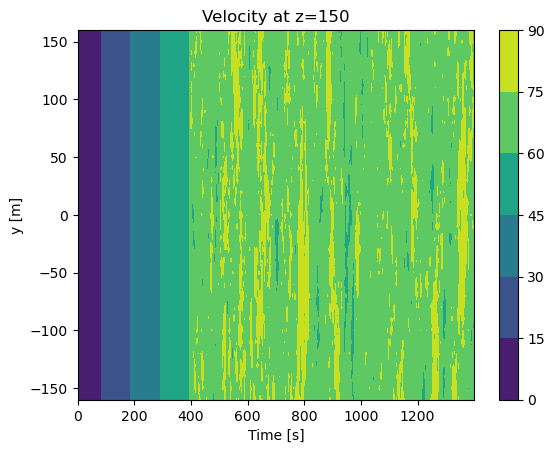

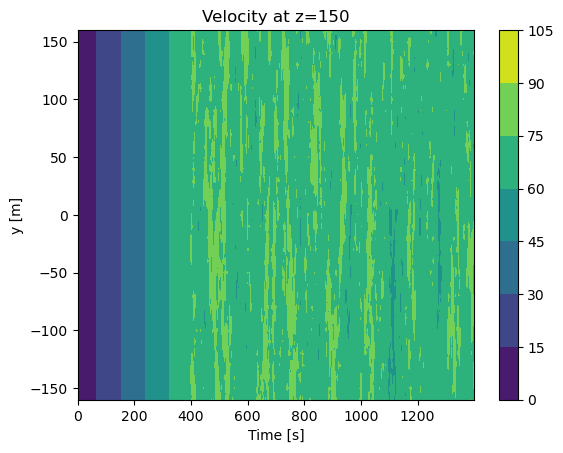

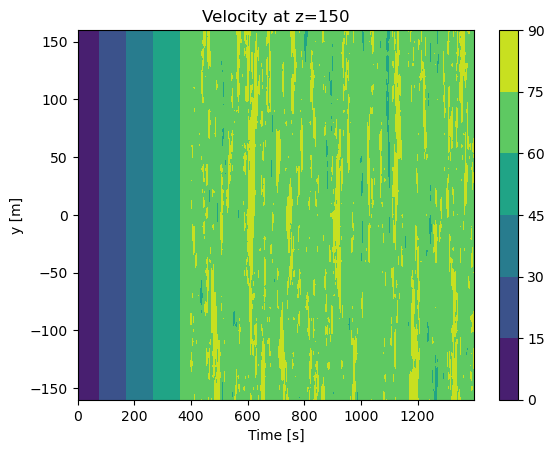

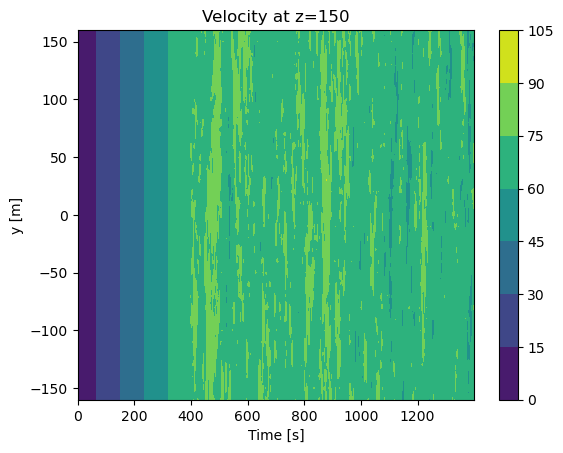

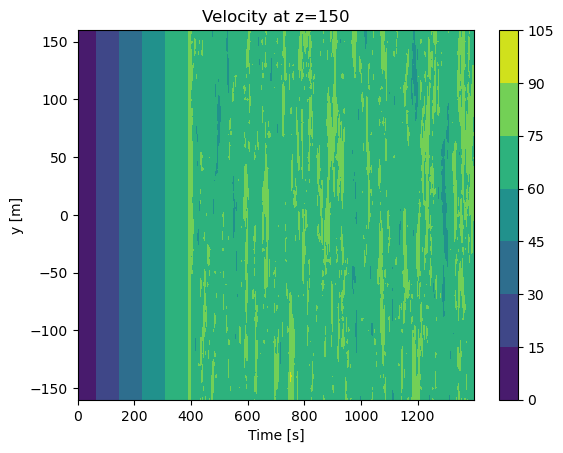

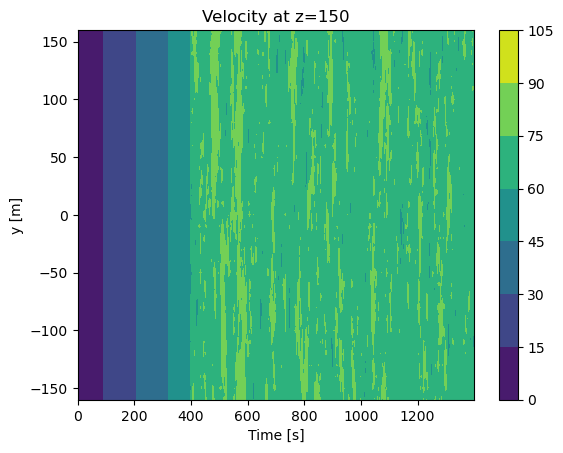

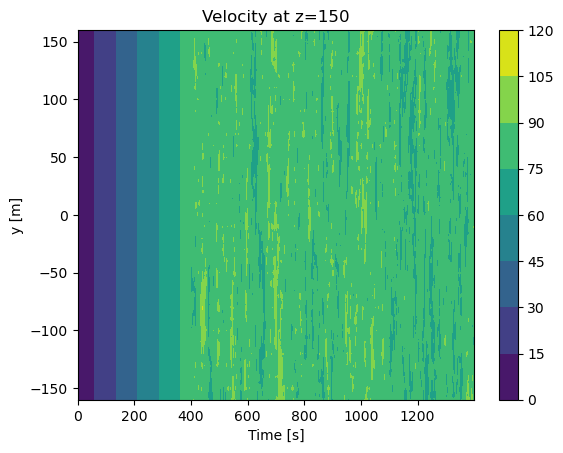

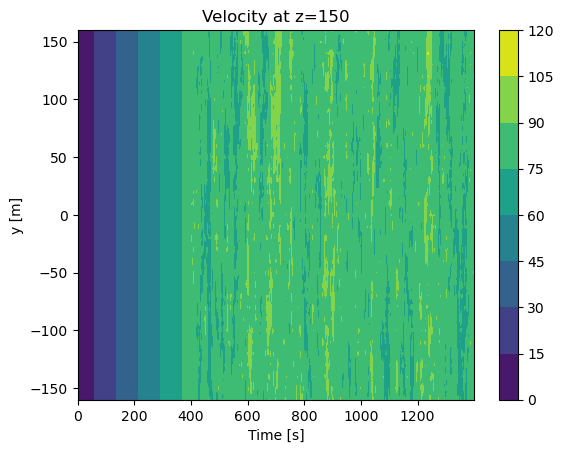

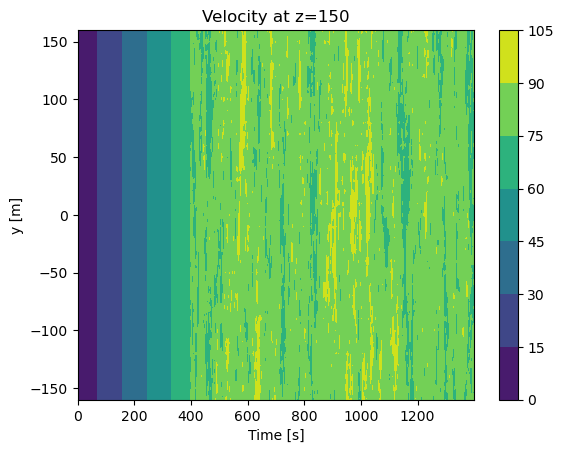

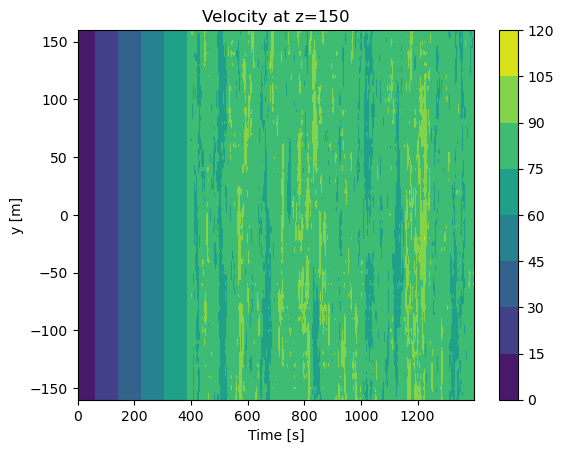

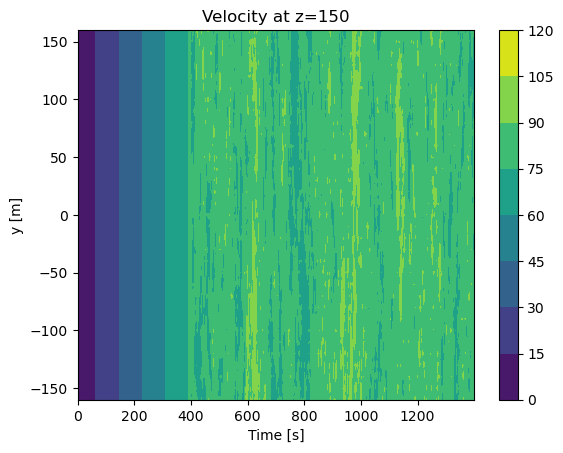

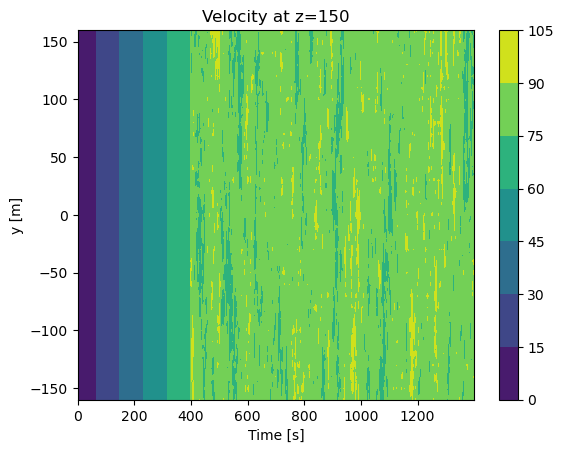

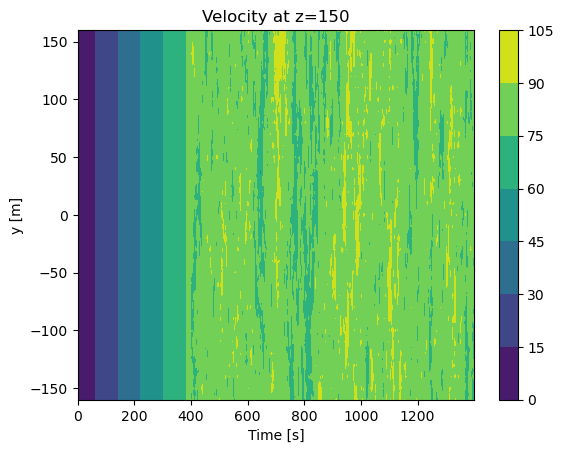

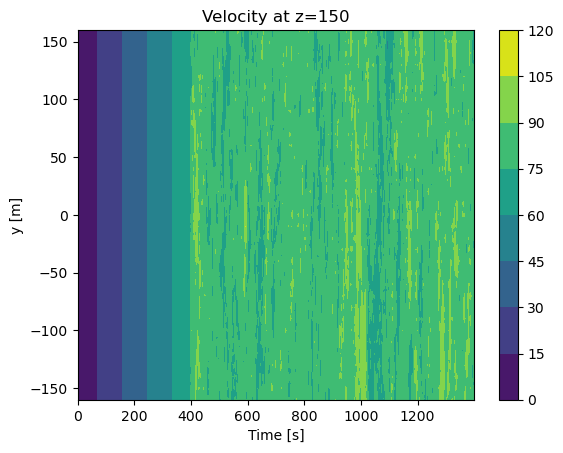

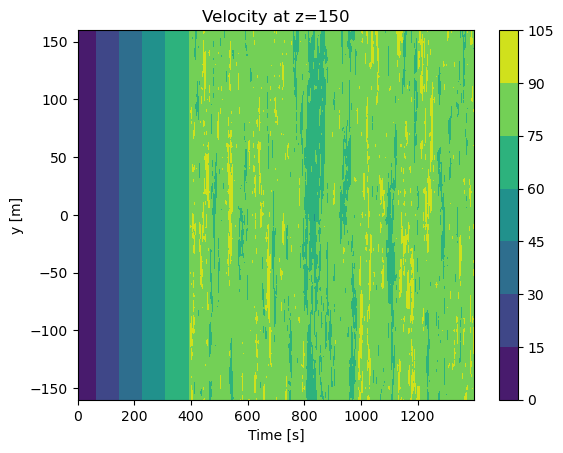

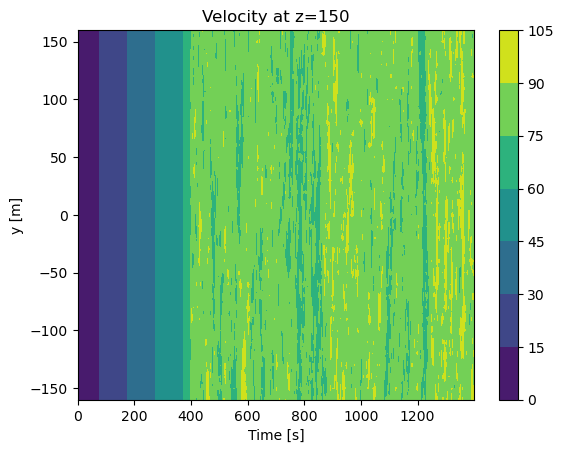

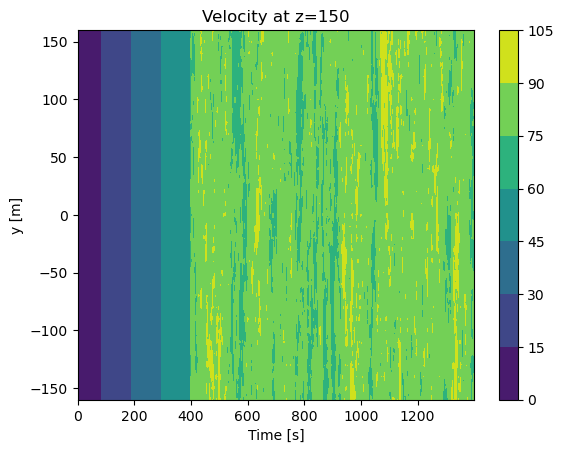

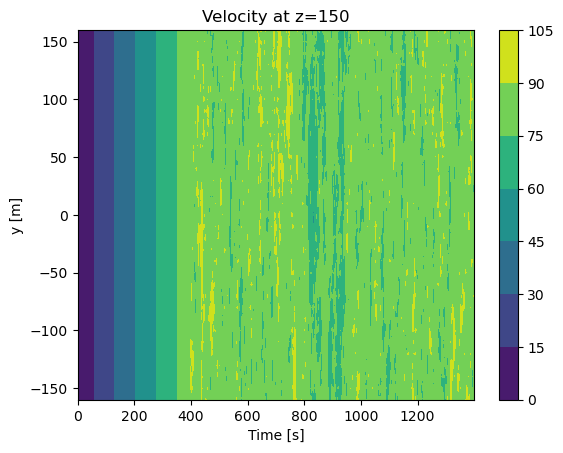

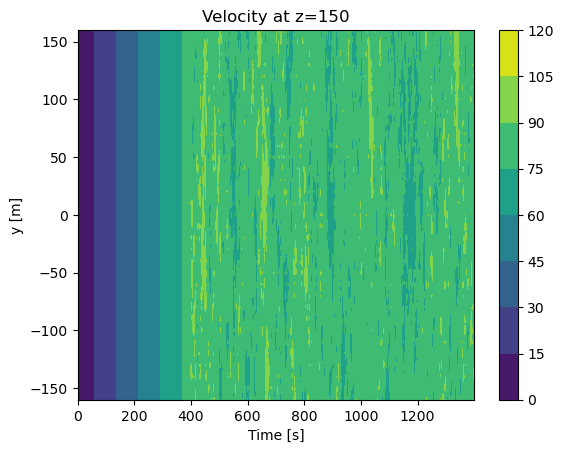

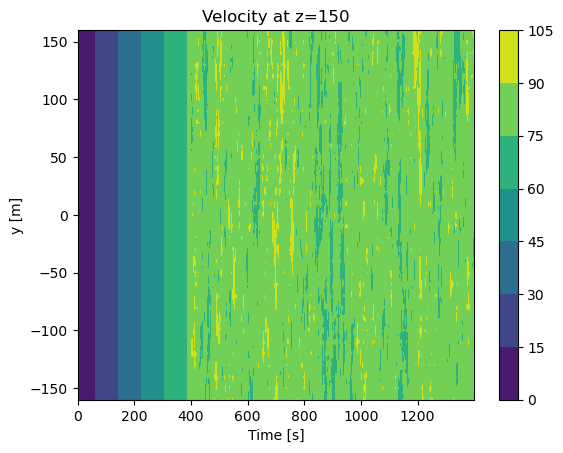

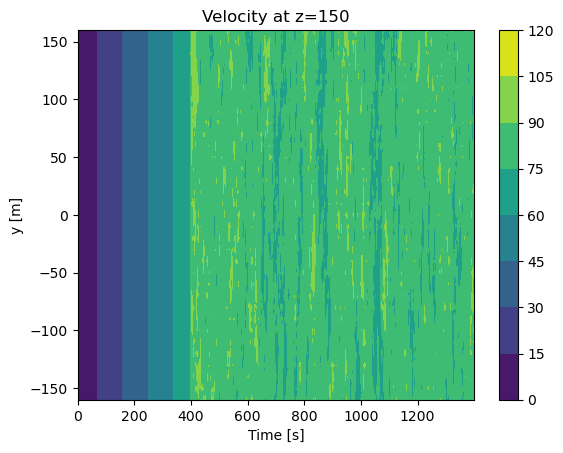

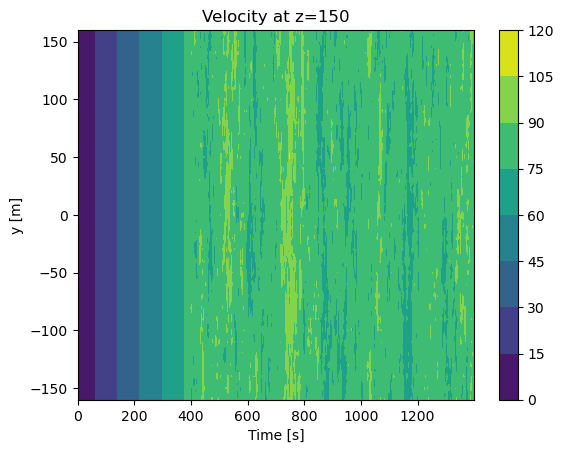

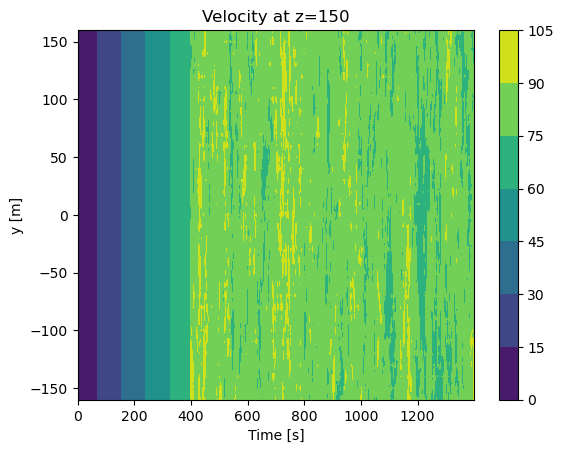

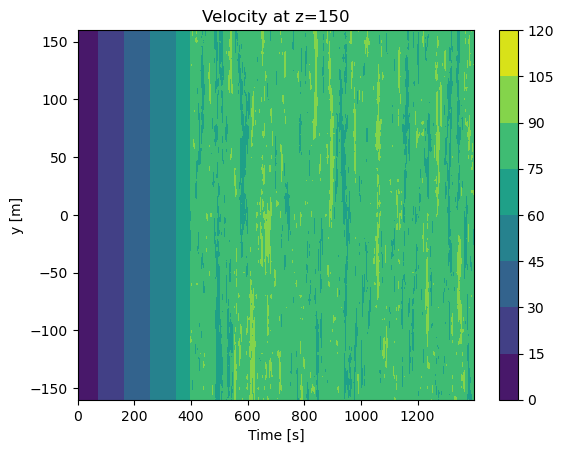

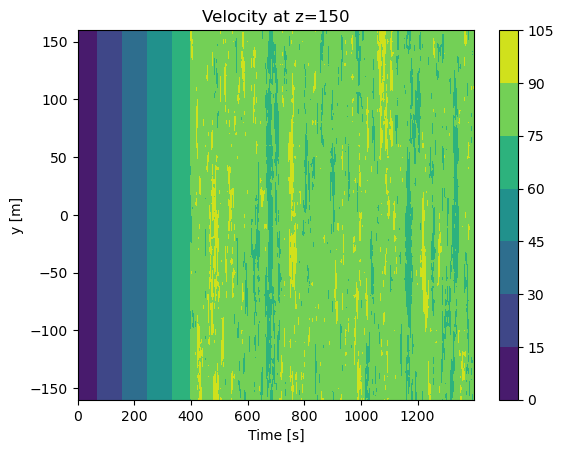

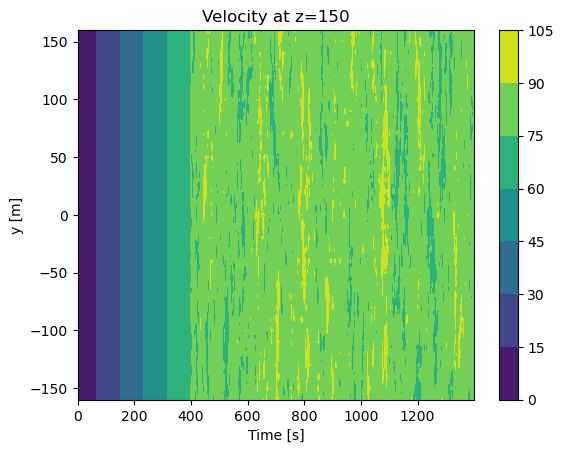

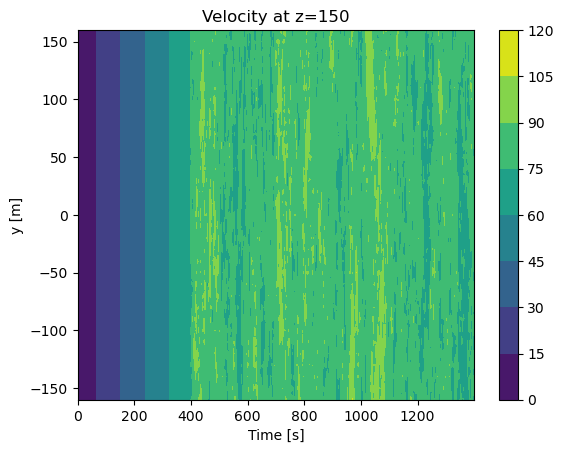

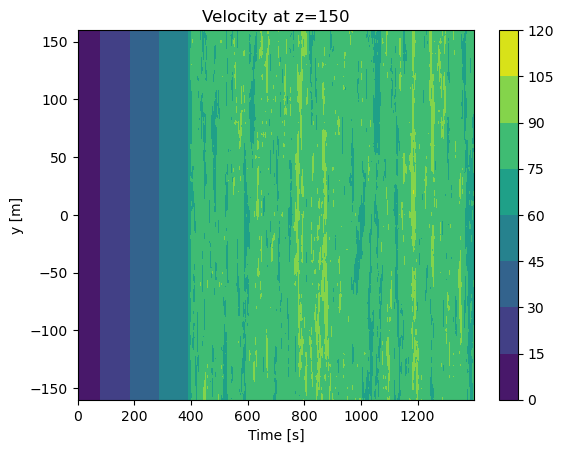

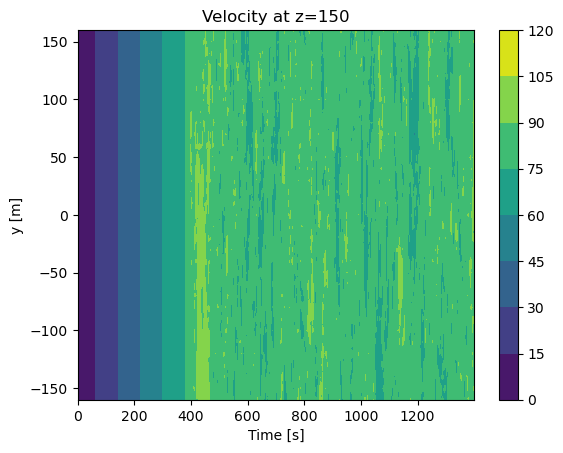

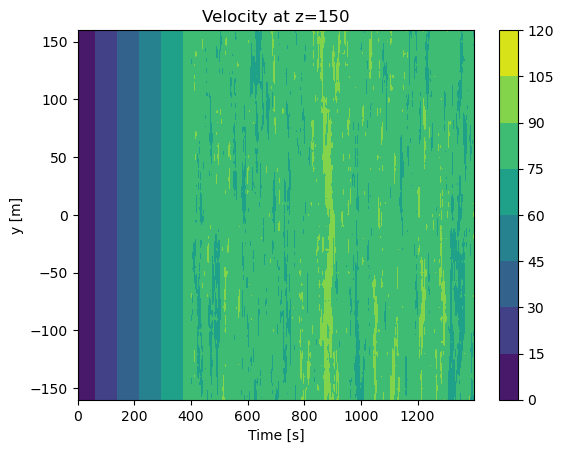

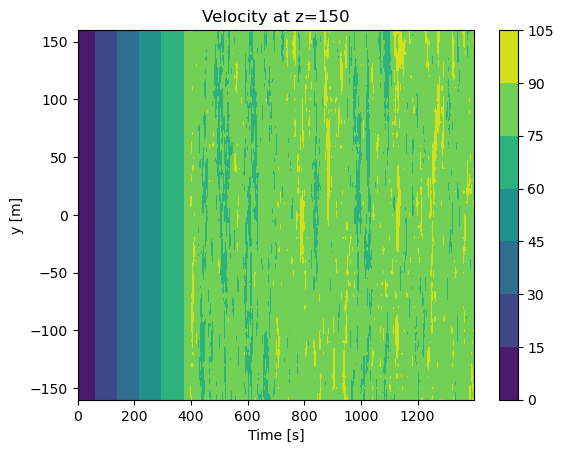

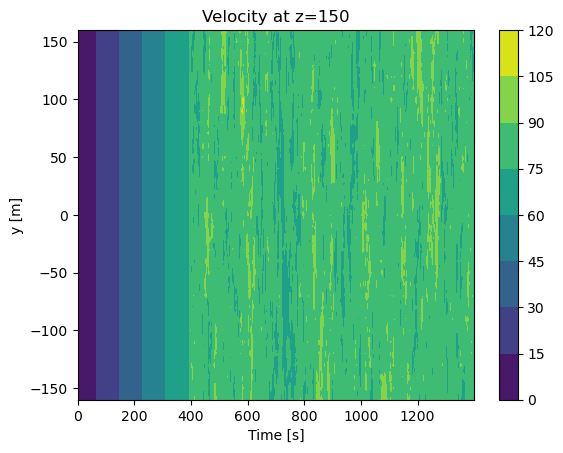

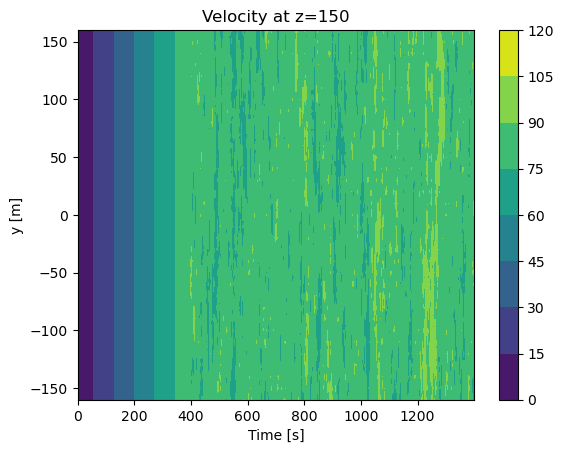

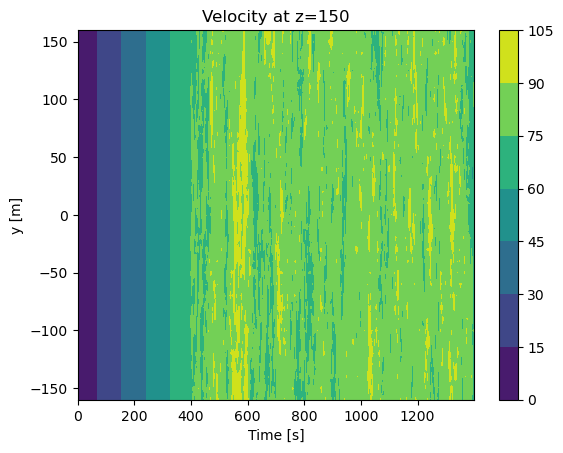

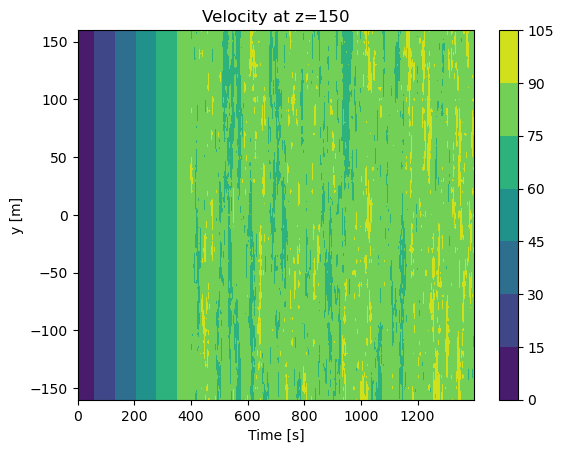

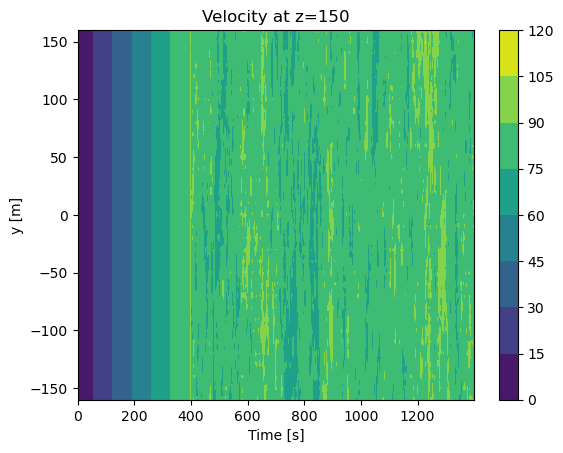

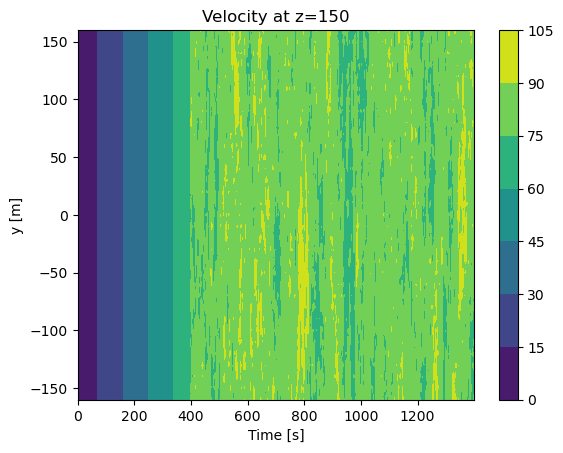

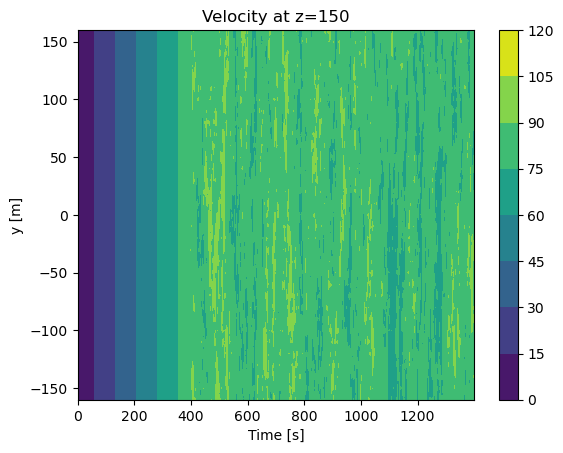

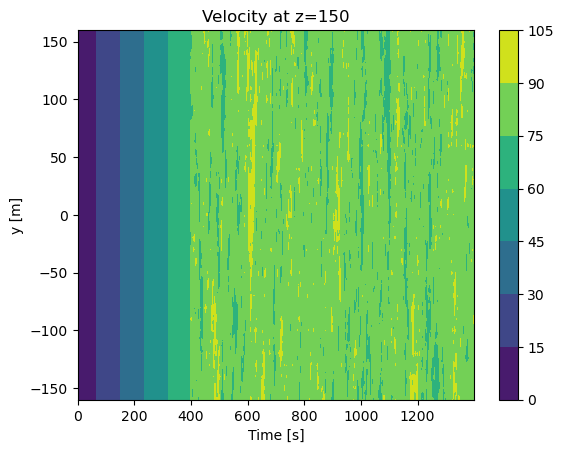

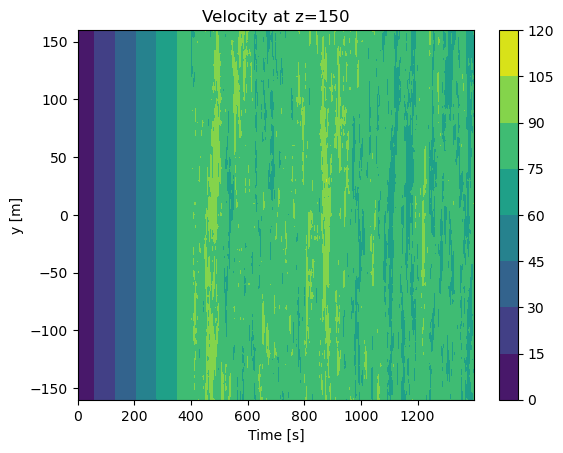

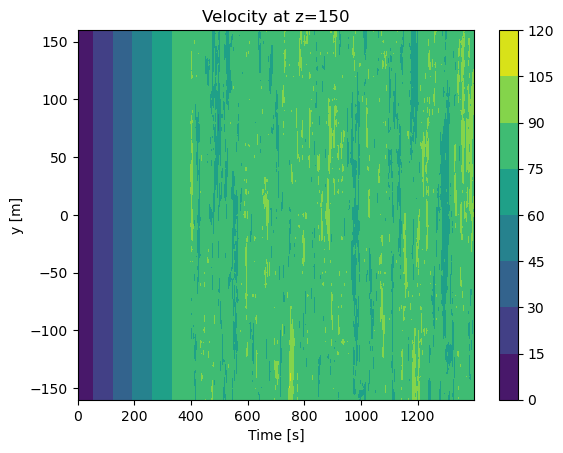

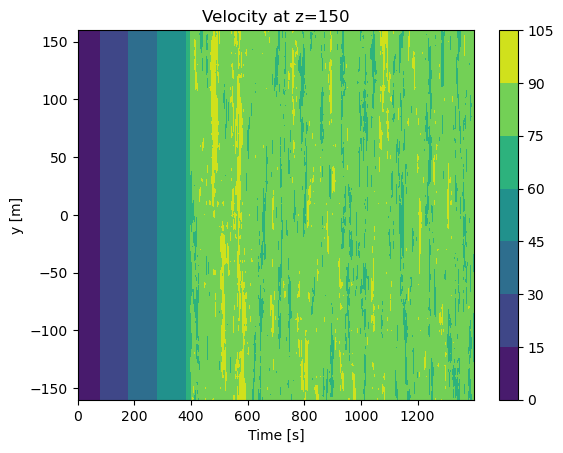

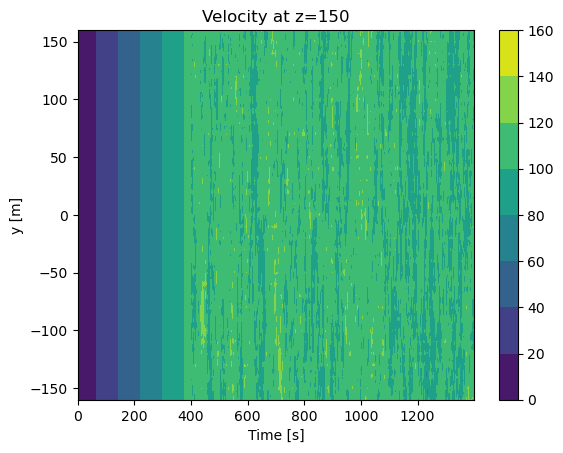

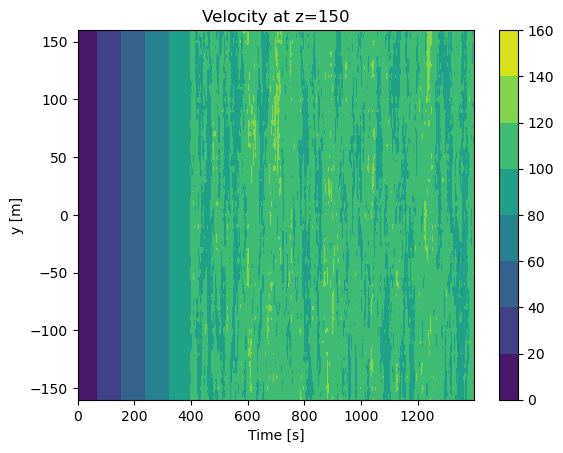

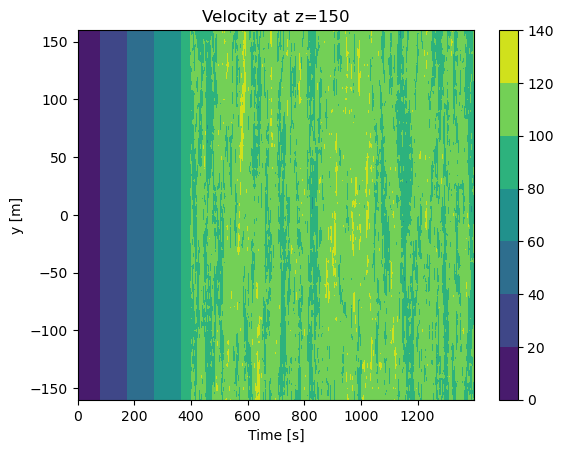

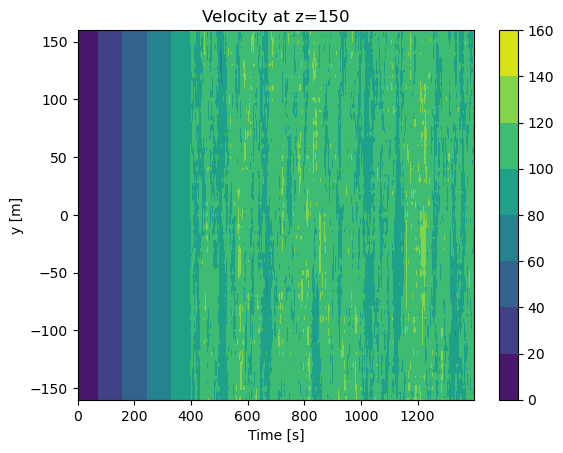

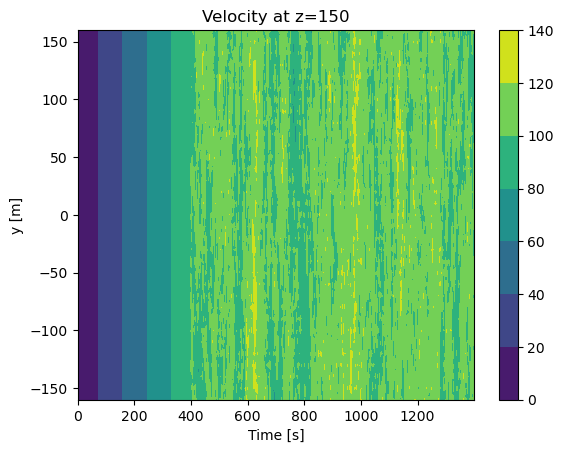

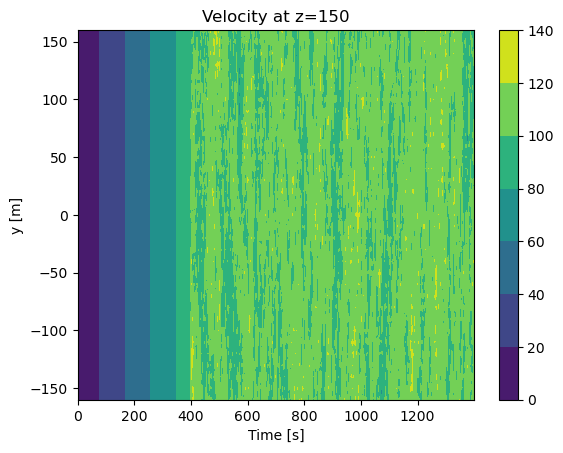

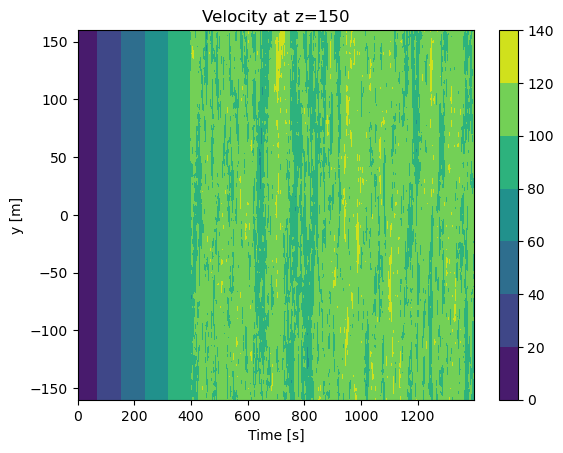

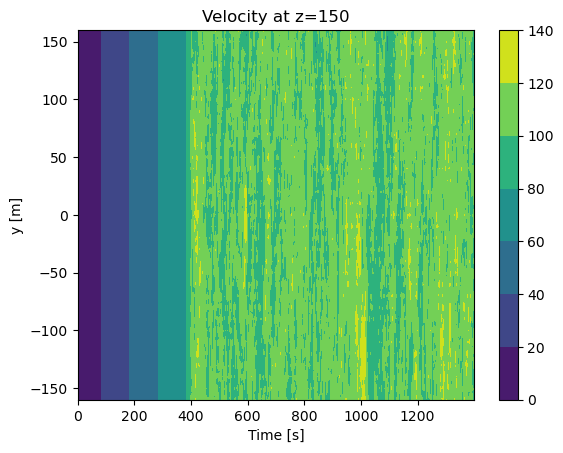

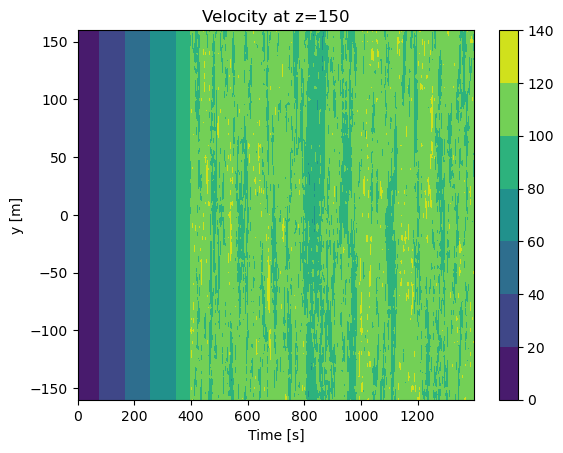

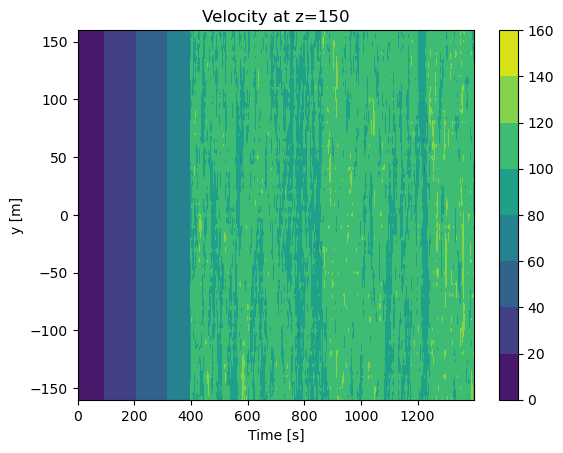

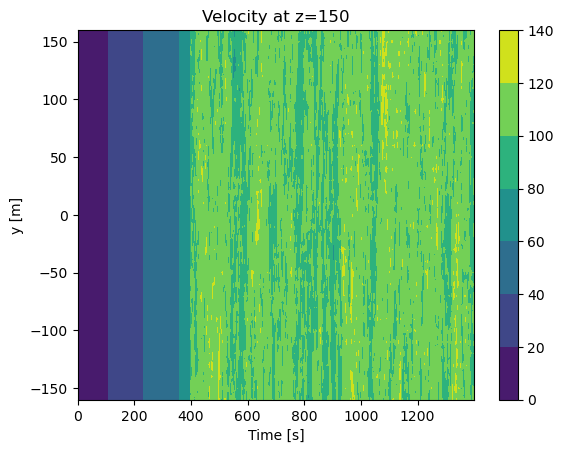

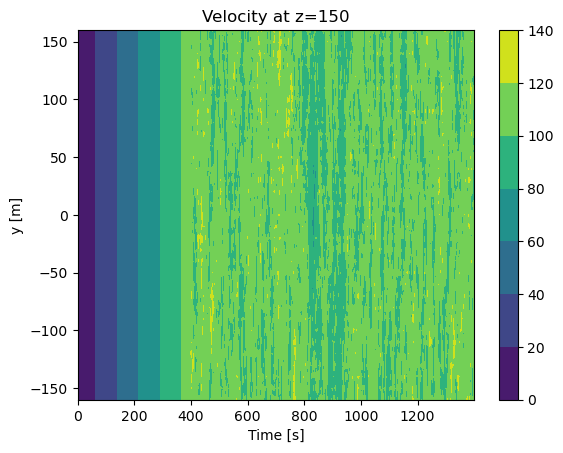

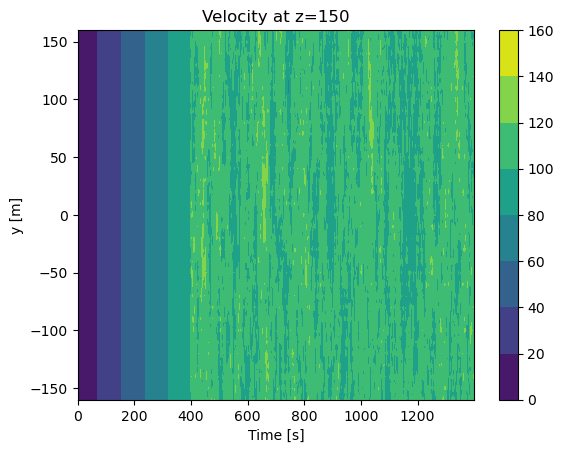

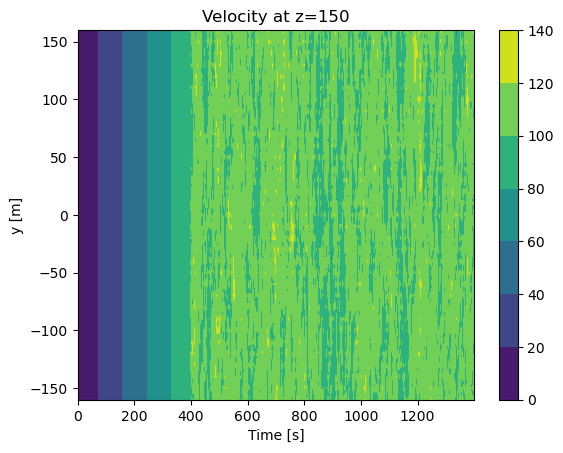

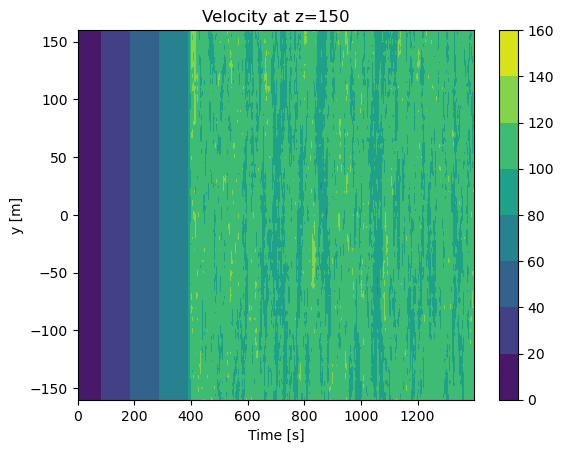

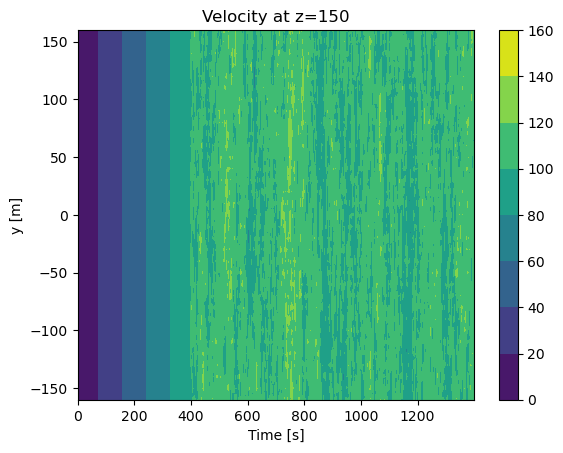

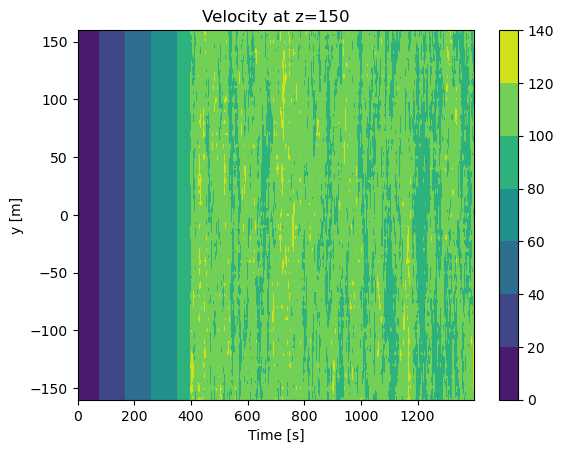

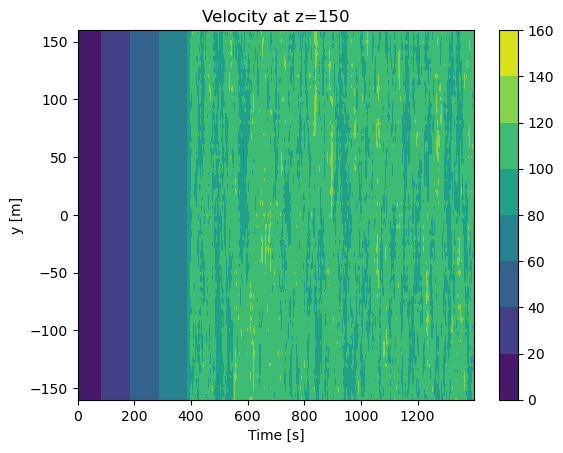

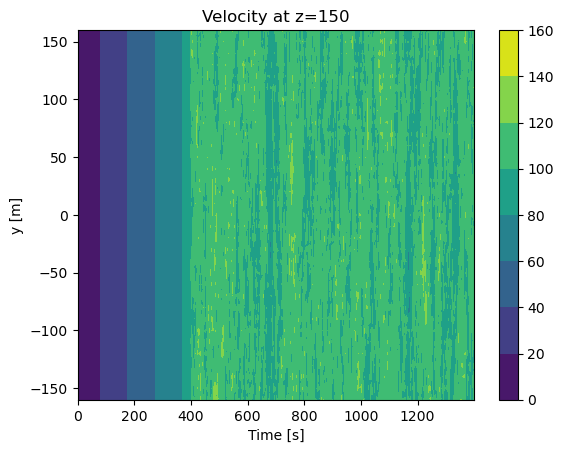

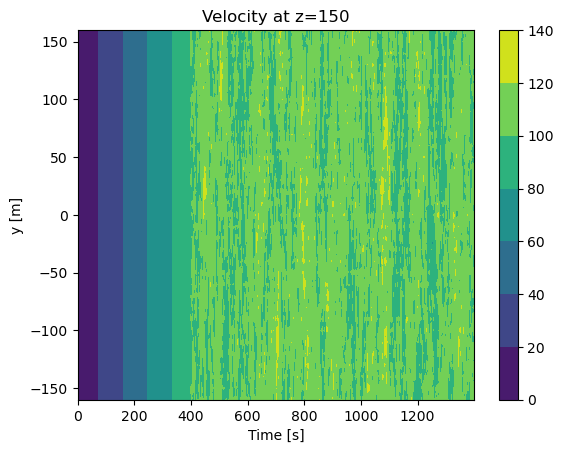

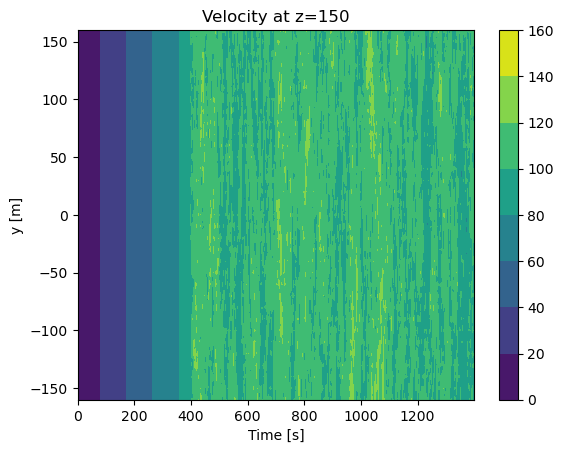

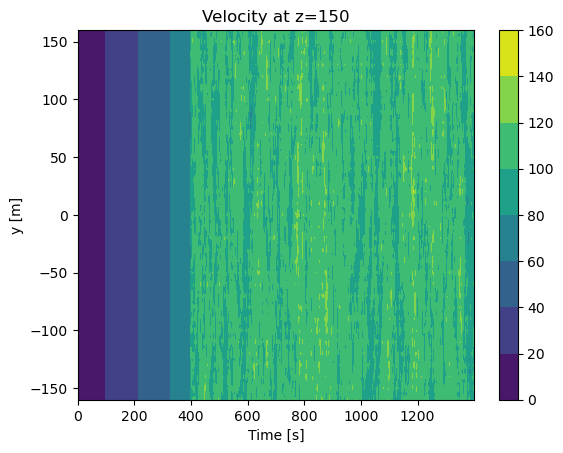

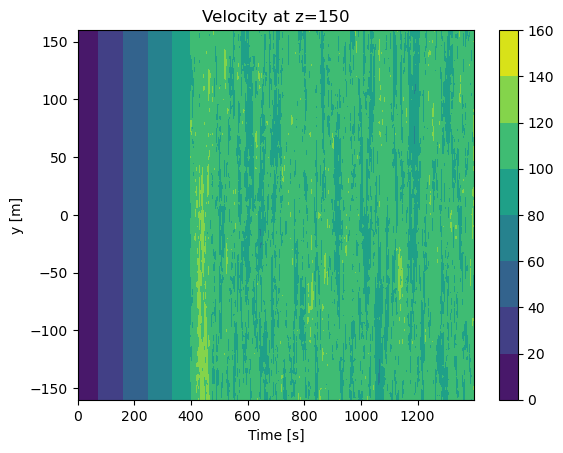

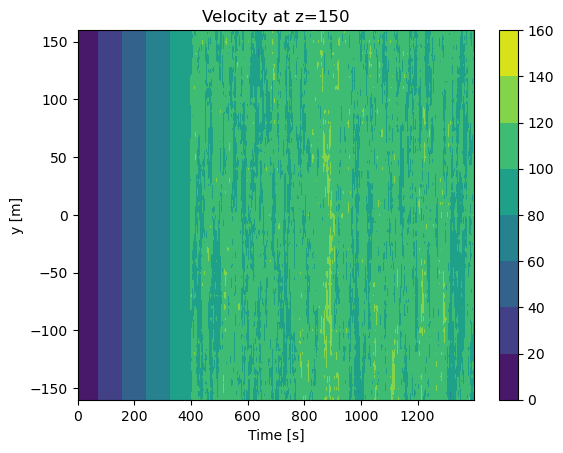

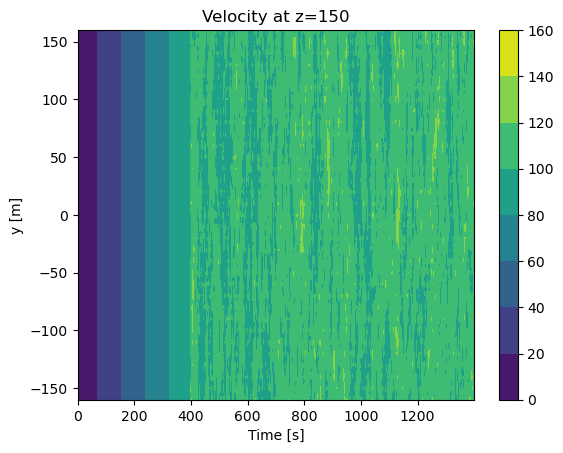

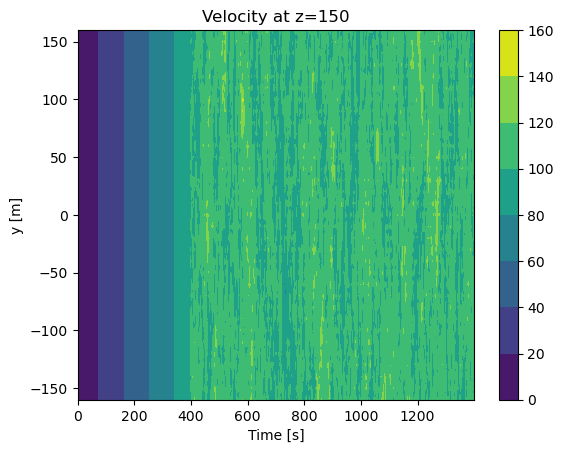

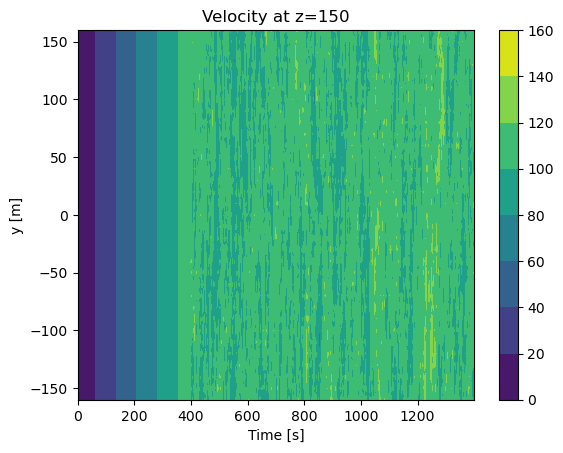

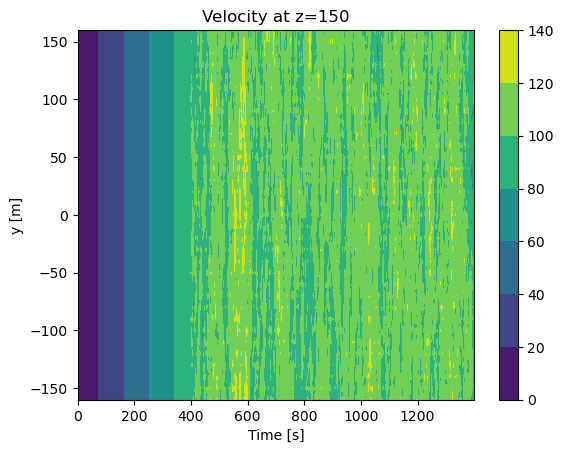

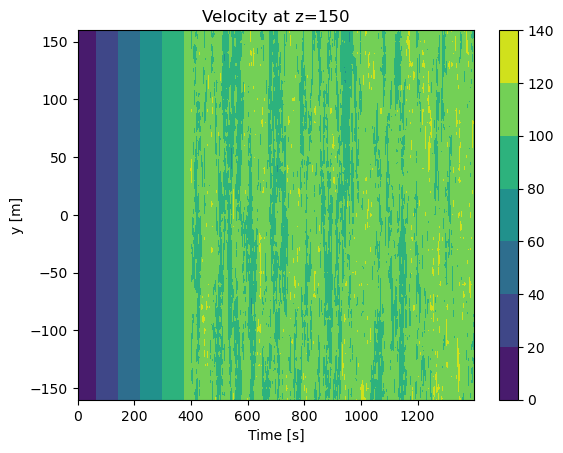

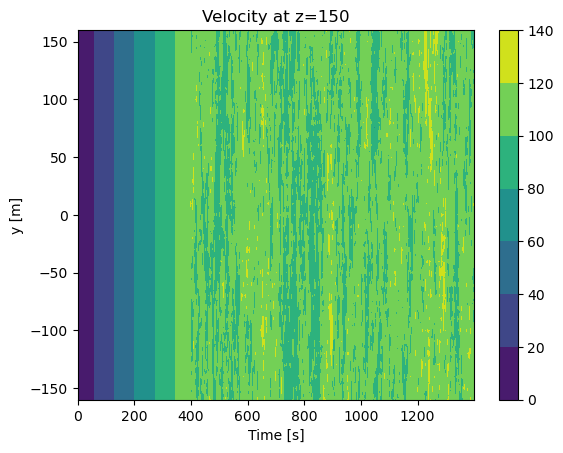

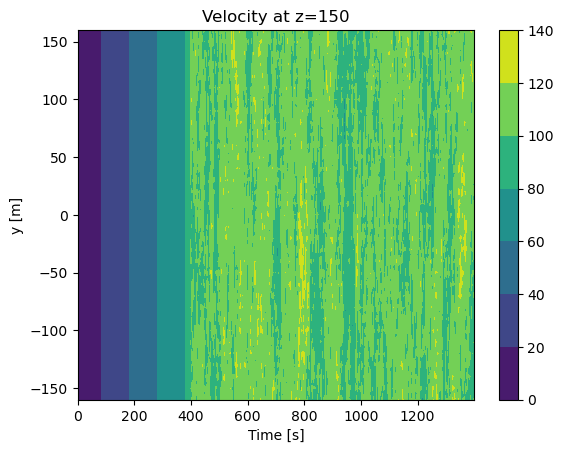

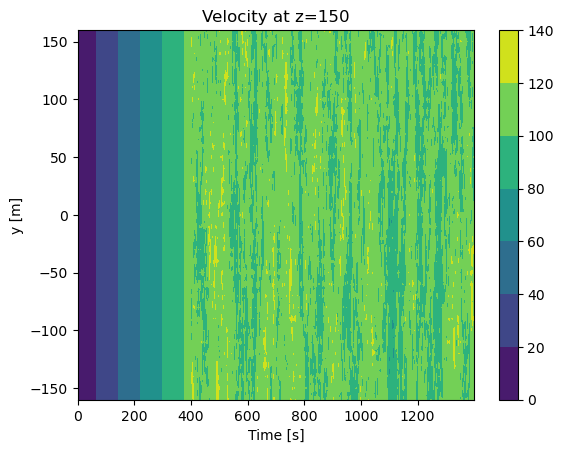

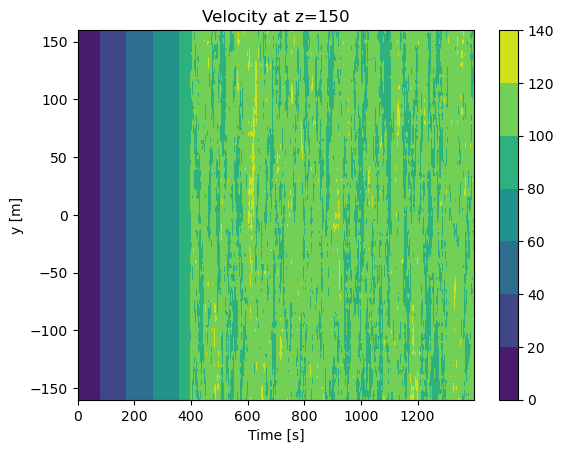

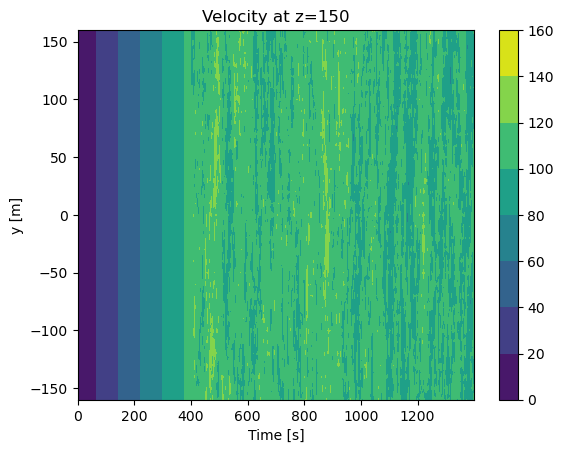

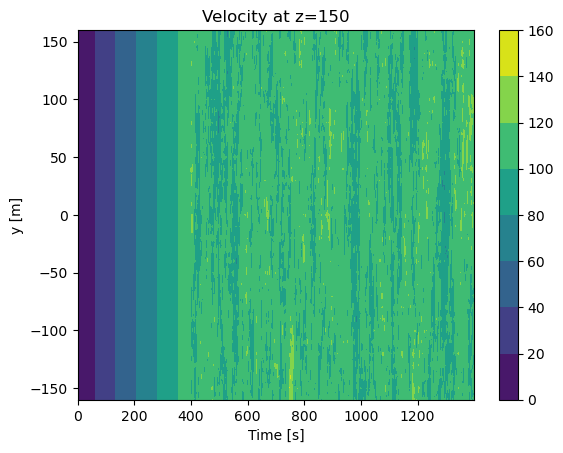

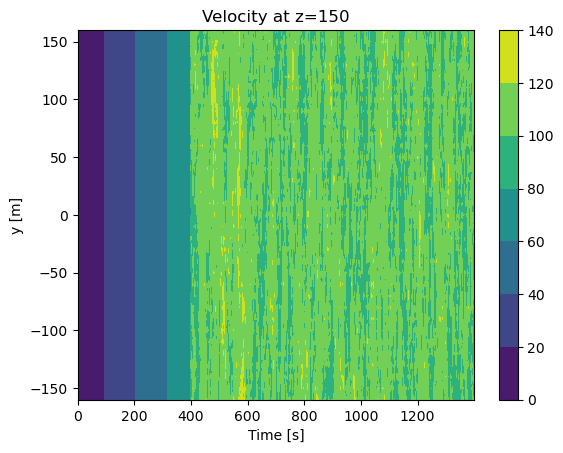

In [13]:
for id, btsFile in enumerate(btsFiles):

    tsMod2 = TurbSimFile(btsFile)
    print(tsMod2)

    time4Ramp = 400.0 # seconds
    dt = tsMod2['dt']
    nRamp = int(time4Ramp / dt)

    iy, iz = tsMod2.closestPoint(y=0, z=150)

    print(nRamp)

    # Compute the ramp required to get to the desired wind speed
    ramp = np.linspace(3.0, tsMod2['u'][0,0,iy,iz], nRamp)


    # Create a new wind field with the ramp
    tempWind = np.zeros(shape=(3, nRamp, tsMod2['y'].size, tsMod2['z'].size), dtype=float)


    for idx in range(ramp.size):
        tempWind[0,idx,:,:] = ramp[idx]
        tempWind[1,idx,:,:] = 0.0
        tempWind[2,idx,:,:] = 0.0

    tsMod2['t'] = np.concatenate((np.linspace(0.0, time4Ramp, nRamp), tsMod2['t'] + time4Ramp), axis=0)
    tsMod2['u'] = np.concatenate((tempWind, tsMod2['u']), axis=1)

    # reshaping the tower wind field
    tsMod2['uTwr'] = tsMod2['uTwr'].reshape(3,tsMod2['t'].size,0)

    # print(tsMod2)

    tsMod2['ID'] = 7 # Changing to non periodic

    # assuming we are reading from the "withoutRamp" folder
    tsMod2.write(f'{os.path.join(os.path.dirname(os.path.dirname(btsFile)), os.path.basename(btsFile)[:-4] + "_ramp.bts")}')

    # --- Extract a horizontal plane and plot it
    U, V, W = tsMod2.horizontalPlane(z=150)
    T, Y = np.meshgrid(tsMod2.t, tsMod2.y)
    fig,ax = plt.subplots(1, 1)
    cs = ax.contourf(T, Y, U.T)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('y [m]')
    ax.set_title('Velocity at z=150')
    plt.colorbar(cs)

    plt.savefig(f'{os.path.join(os.path.dirname(os.path.dirname(btsFile)), os.path.basename(btsFile)[:-4] + "_ramp.png")}')